In [1]:
import pandas as pd
import seaborn as sns
import re

In [2]:
df_whole = pd.read_csv('../data/processed/02_cleaned_data.csv', index_col=0)

In [3]:
df_whole.shape

(975, 836)

In [4]:
df_whole.head()

,AP1. Wie alt sind Sie?,AP1. Wie alt sind Sie?_0.0,AP1. Wie alt sind Sie?_1.0,AP1. Wie alt sind Sie?_10.0,AP1. Wie alt sind Sie?_2.0,AP1. Wie alt sind Sie?_3.0,AP1. Wie alt sind Sie?_4.0,AP1. Wie alt sind Sie?_5.0,AP1. Wie alt sind Sie?_6.0,AP1. Wie alt sind Sie?_7.0,...,W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],W9. Bekommen Sie Ihre Vergütung pünktlich zum vertraglich vereinbarten Zeitpunkt?_1,W9. Bekommen Sie Ihre Vergütung pünktlich zum vertraglich vereinbarten Zeitpunkt?_Teils,id. Antwort ID
0,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,953
1,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,24
2,4.0,False,False,False,False,False,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,57
3,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,65
4,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,93


# Correlation Analysis

In [5]:
# Calculate the correlation matrix
corr_matrix = df_whole.corr(method='pearson')

# Gather unique pairs of correlations
correlations = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Start from i+1 to avoid duplicates and self-correlations
        correlations.append([corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]])

# Create a DataFrame to hold the correlations
corr_df = pd.DataFrame(correlations, columns=['Column1', 'Column2', 'CorrelationCoefficient'])

print(corr_df)

                                                  Column1  \
0                                  AP1. Wie alt sind Sie?   
1                                  AP1. Wie alt sind Sie?   
2                                  AP1. Wie alt sind Sie?   
3                                  AP1. Wie alt sind Sie?   
4                                  AP1. Wie alt sind Sie?   
...                                                   ...   
349025  W8[SQ004]. Wie werden zusätzlich geleistete Ar...   
349026  W8[SQ004]. Wie werden zusätzlich geleistete Ar...   
349027  W9. Bekommen Sie Ihre Vergütung pünktlich zum ...   
349028  W9. Bekommen Sie Ihre Vergütung pünktlich zum ...   
349029  W9. Bekommen Sie Ihre Vergütung pünktlich zum ...   

                                                  Column2  \
0                              AP1. Wie alt sind Sie?_0.0   
1                              AP1. Wie alt sind Sie?_1.0   
2                             AP1. Wie alt sind Sie?_10.0   
3                      

In [6]:
print(corr_df.head())
len(corr_df)

                  Column1                      Column2  CorrelationCoefficient
0  AP1. Wie alt sind Sie?   AP1. Wie alt sind Sie?_0.0               -0.170962
1  AP1. Wie alt sind Sie?   AP1. Wie alt sind Sie?_1.0               -0.438887
2  AP1. Wie alt sind Sie?  AP1. Wie alt sind Sie?_10.0                0.238561
3  AP1. Wie alt sind Sie?   AP1. Wie alt sind Sie?_2.0               -0.456681
4  AP1. Wie alt sind Sie?   AP1. Wie alt sind Sie?_3.0               -0.120230


349030

In [7]:
corr_df_sorted = corr_df.sort_values(by='CorrelationCoefficient')

In [8]:
significant_corr_df =  corr_df[(corr_df['CorrelationCoefficient']>0.7) | (corr_df['CorrelationCoefficient']<-0.7)]
len(significant_corr_df)

549

In [9]:
significant_corr_df.to_csv('../data/processed/03_significant_correlations.csv')
corr_df.to_csv('../data/processed/03_all_correlations.csv')

# visualizations

## functions

In [10]:
def cross_analysis_one_hot(cols_first:list, cols_second:list, df=df_whole):
    '''
    A function that performs a cross analysis between two one hot encoded questions. 
    It returns a dataframe with sum and percentage values for combinations of the first and second columns from the whole dataframe.
    
        Parameters:
        - cols_first (list of strings of column names) -> those become the index of the new dataframe
        - cols_second (list of string of column names) -> those become the columns of the new dataframe
        - df (dataframe, standard: df_whole) -> dataframe with columns specified in cols_first and cols_second
    
        Returns:
        - pandas DataFrame with sum and percentage values of index-column combinations
        - list of percentage column names that can be used for data visualization
    '''
    
    # initialize empty DataFrame
    aggregated_df = pd.DataFrame(index=cols_first, columns=cols_second).fillna(0)

    for level_index in cols_first:
        for level_cols in cols_second:
            # Sum the age counts for the current career path
            aggregated_df.loc[level_index, level_cols] = df[df[level_index] == True][level_cols].sum()
        
    # rename indices and column names
    aggregated_df.columns = cols_second

    #aggregated_df.index = career
    aggregated_df['totals'] = aggregated_df.sum(axis=1)
    
    ls_perc_columns = []
    for col in aggregated_df.loc[:, aggregated_df.columns != 'totals'].columns:
        percentage_column_name = f'{col}Percentage'
        ls_perc_columns.append(percentage_column_name)
        aggregated_df[percentage_column_name] = (aggregated_df[col] / aggregated_df['totals']) * 100
    
    
    return aggregated_df, ls_perc_columns

In [11]:
def cross_analysis_non_one_hot(col_name:str, oh_cols:list, df=df_whole, transpose=False):
    '''
    Aggregate data based on a non-hot-encoded column for multiple one-hot-encoded columns.

    Parameters:
    - col_name: str, name of the non-one-hot-encoded column.
    - oh_cols: list of str, names of the one-hot-encoded-columns.
    - df: pandas DataFrame containing the data.
    - transpose: False or True to transpose the data

    Returns:
    - pandas DataFrame with aggregated data and percentages for each category in the non-hot encoded column.
    - list of percentage column names that can be used for data visualization
    '''
    # Initialize aggregation dictionary
    agg_dict = {col: pd.NamedAgg(column=col, aggfunc='sum') for col in oh_cols}
    
    # Aggregate the data
    df_aggregated = df.groupby(col_name).agg(**agg_dict).reset_index()
    
    if transpose == False:
        # Calculate totals
        df_aggregated['totals'] = df_aggregated[oh_cols].sum(axis=1)

        # Calculate percentages for each contract type
        ls_perc_columns = []
        for col in oh_cols:
            percentage_col = f'{col}Perc'
            ls_perc_columns.append(percentage_col)
            df_aggregated[percentage_col] = (df_aggregated[col] / df_aggregated['totals']) * 100
            df_aggregated[percentage_col].fillna(0, inplace=True)  # Handle division by zero
    
    else: #Todo:write process for transposed data
        df_aggregated = df_aggregated.T
        df_aggregated.columns = [f"{df_aggregated.index[0]}_{df_aggregated.iloc[0, i]}_sum" for i in range(len(df_aggregated.columns))]
        df_aggregated.drop(index=df_aggregated.index[0], axis=0, inplace=True)
        df_aggregated['totals'] = df_aggregated.sum(axis=1)
        
        ls_perc_columns = []
        for col in df_aggregated.columns:
            if col != 'totals':
                percentage_col = f'{col}Perc'
                ls_perc_columns.append(percentage_col)
                df_aggregated[percentage_col] = (df_aggregated[col] / df_aggregated['totals']) * 100
                df_aggregated[percentage_col].fillna(0, inplace=True)  # Handle division by zero
        

    return df_aggregated, ls_perc_columns

## try out scatter plot

In [12]:
significant_corr_df.iloc[0][1]

/tmp/ipykernel_30848/2159218889.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  significant_corr_df.iloc[0][1]


'AP5r[SQ002]. Bitte machen Sie folgende Angaben:\xa0 [In wie vielen Berufsjahren insgesamt (Jahre in Ziffern)? ]'

/tmp/ipykernel_30848/1352033493.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x=significant_corr_df.iloc[0][0],
/tmp/ipykernel_30848/1352033493.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=significant_corr_df.iloc[0][1],


<Axes: xlabel='AP1. Wie alt sind Sie?', ylabel='AP5r[SQ002]. Bitte machen Sie folgende Angaben:\xa0 [In wie vielen Berufsjahren insgesamt (Jahre in Ziffern)? ]'>

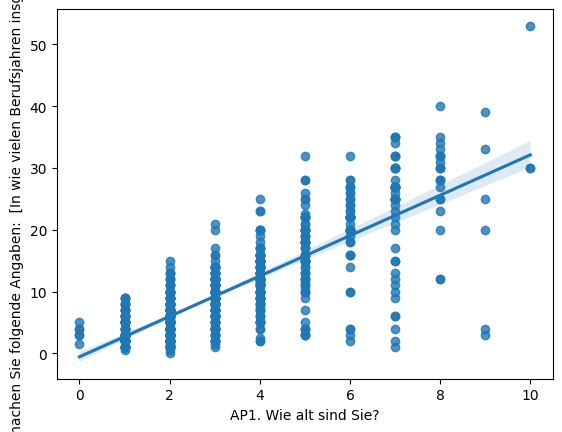

In [13]:
sns.regplot(data=df_whole, 
            x=significant_corr_df.iloc[0][0], 
            y=significant_corr_df.iloc[0][1],
            ci=95)

## fixed term vs permanent contracts Museum

In [14]:
#extract columns with education levels
ls_cols_education_level = [col for col in df_whole if col.startswith('AP2[')]
ls_cols_contract = [col for col in df_whole if col.startswith('M9.')]

#extract education levels
# Regular expression to find a string inside square brackets at the end of column
pattern = re.compile(r'\[([^\]]*)\]$')
strings_inside_brackets = [pattern.search(col).group(1) if pattern.search(col) else None for col in ls_cols_education_level]
print(strings_inside_brackets)

['Bachelor of Arts: ', 'Master of Arts:', 'Magister Artium:', 'I. Staatsexamen:', 'II. Staatsexamen:', 'Diplom:', 'Dr. phil.:', 'Dr. phil. habil. bzw. PD:', 'Sonstiges:', 'Ausländischer akademischer Grad:']


In [15]:
edu_con_df, educ_con_cols_perc = cross_analysis_one_hot(ls_cols_education_level, ls_cols_contract)
edu_con_df

,M9. Sind Sie momentan befristet beschäftigt? _1,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.",totals,M9. Sind Sie momentan befristet beschäftigt? _1Percentage,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.Percentage"
AP2[SQ001]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Bachelor of Arts: ],41,12,53,77.358491,22.641509
AP2[SQ002]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Master of Arts:],129,47,176,73.295455,26.704545
AP2[SQ003]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Magister Artium:],40,58,98,40.816327,59.183673
AP2[SQ004]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [I. Staatsexamen:],1,1,2,50.000000,50.000000
AP2[SQ005]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [II. Staatsexamen:],0,1,1,0.000000,100.000000
AP2[SQ006]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Diplom:],3,2,5,60.000000,40.000000
AP2[SQ007]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Dr. phil.:],49,70,119,41.176471,58.823529
AP2[SQ008]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Dr. phil. habil. bzw. PD:],2,1,3,66.666667,33.333333
AP2[SQ009]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Sonstiges:],4,4,8,50.000000,50.000000
AP2[SQ010]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Ausländischer akademischer Grad:],1,3,4,25.000000,75.000000


Text(1.02, 0.985, 'Gesamtzahl')

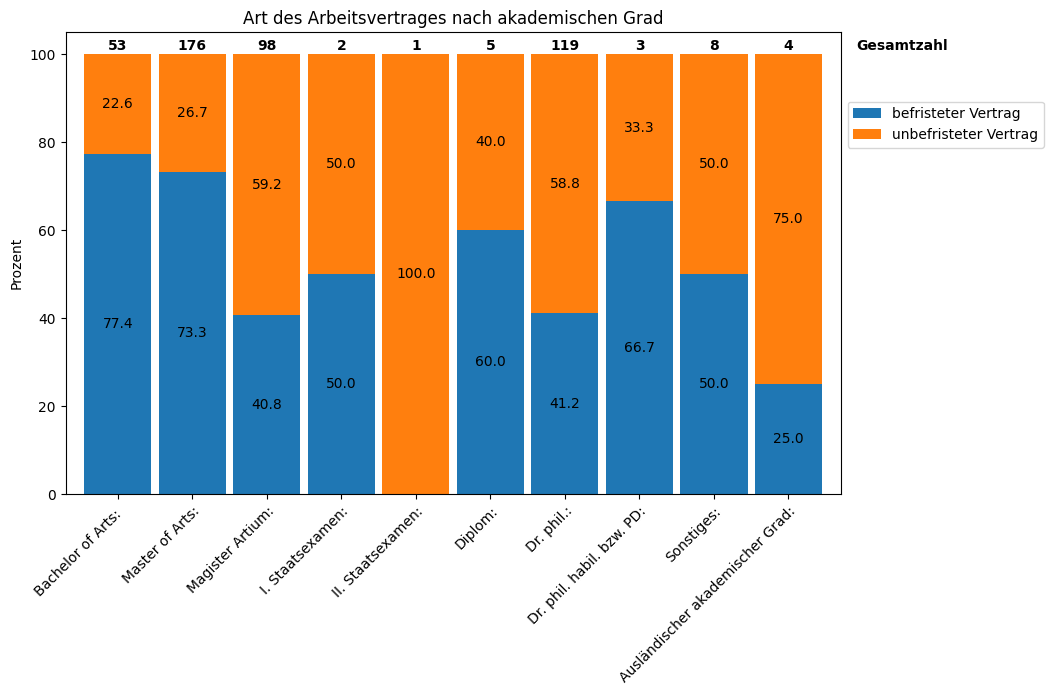

In [16]:
ax = edu_con_df[educ_con_cols_perc].plot(kind='bar', 
                                        stacked=True, 
                                        figsize=(10, 6), 
                                        rot=45, ylabel='Prozent', 
                                        width=0.9, 
                                        title='Art des Arbeitsvertrages nach akademischen Grad'
                                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(edu_con_df['totals']):
    ax.text(edu_con_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.set_xticklabels(strings_inside_brackets, rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['befristeter Vertrag', 'unbefristeter Vertrag'])

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')
    

In [17]:
fig = ax.get_figure()
fig.savefig('../reports/figures/M_00_Abschluss_vs_Arbeitsvertrag.png', bbox_inches='tight', dpi=300)

## fixed term or permanent contracts by age group

In [18]:
ls_cols_age_level = [col for col in df_whole if col.startswith('AP1.') & col.endswith('.0')]
#the order of age levels needs to be sorted by hand, since age level 10 is not placed at the end of list
order = [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 2]
ls_cols_age_level = [ls_cols_age_level[i] for i in order]
decoded_age_level = ['Unter 25',
                     '25-29',
                     '30-34',
                     '35-39',
                     '40-44',
                     '45-49',
                     '50-54',
                     '55-59',
                     '60-64',
                     '65-69',
                     'Über 70']

In [19]:
ls_cols_age_level

['AP1. Wie alt sind Sie?_0.0',
 'AP1. Wie alt sind Sie?_1.0',
 'AP1. Wie alt sind Sie?_2.0',
 'AP1. Wie alt sind Sie?_3.0',
 'AP1. Wie alt sind Sie?_4.0',
 'AP1. Wie alt sind Sie?_5.0',
 'AP1. Wie alt sind Sie?_6.0',
 'AP1. Wie alt sind Sie?_7.0',
 'AP1. Wie alt sind Sie?_8.0',
 'AP1. Wie alt sind Sie?_9.0',
 'AP1. Wie alt sind Sie?_10.0']

In [20]:
age_con_df, age_con_perc_col = cross_analysis_one_hot(ls_cols_age_level, ls_cols_contract)
age_con_df

,M9. Sind Sie momentan befristet beschäftigt? _1,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.",totals,M9. Sind Sie momentan befristet beschäftigt? _1Percentage,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.Percentage"
AP1. Wie alt sind Sie?_0.0,3,1,4,75.000000,25.000000
AP1. Wie alt sind Sie?_1.0,40,9,49,81.632653,18.367347
AP1. Wie alt sind Sie?_2.0,81,29,110,73.636364,26.363636
AP1. Wie alt sind Sie?_3.0,45,33,78,57.692308,42.307692
AP1. Wie alt sind Sie?_4.0,35,26,61,57.377049,42.622951
AP1. Wie alt sind Sie?_5.0,9,23,32,28.125000,71.875000
AP1. Wie alt sind Sie?_6.0,2,13,15,13.333333,86.666667
AP1. Wie alt sind Sie?_7.0,5,21,26,19.230769,80.769231
AP1. Wie alt sind Sie?_8.0,1,11,12,8.333333,91.666667
AP1. Wie alt sind Sie?_9.0,0,1,1,0.000000,100.000000


Text(1.02, 0.985, 'Gesamtzahl')

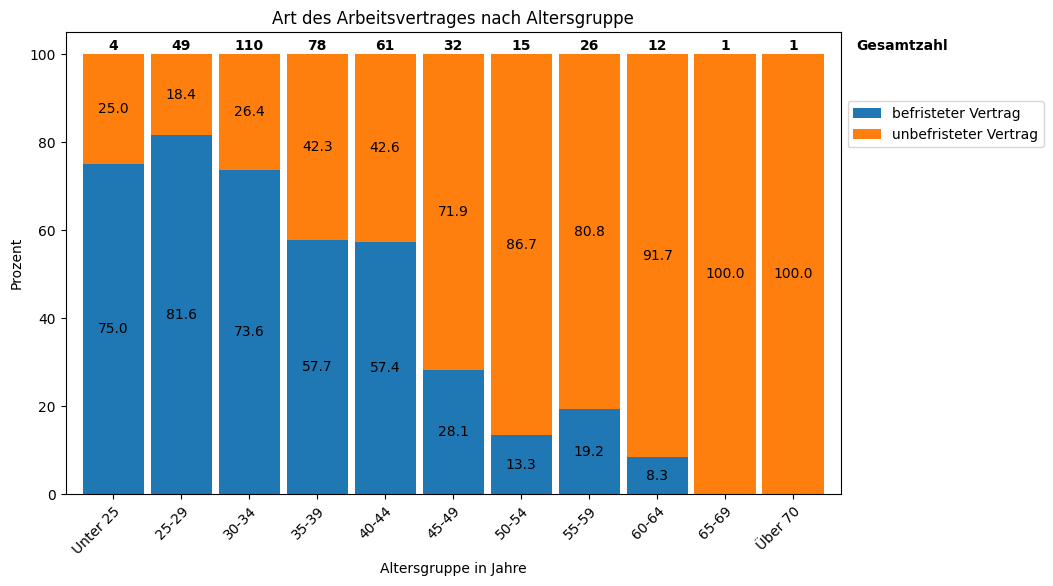

In [21]:
ax = age_con_df[age_con_perc_col].plot(kind='bar', 
                                        stacked=True, 
                                        figsize=(10, 6), 
                                        rot=45, ylabel='Prozent', 
                                        width=0.9, 
                                        title='Art des Arbeitsvertrages nach Altersgruppe',
                                        xlabel='Altersgruppe in Jahre'
                                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(age_con_df['totals']):
    ax.text(age_con_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.set_xticklabels(decoded_age_level, rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['befristeter Vertrag', 'unbefristeter Vertrag'])

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [22]:
fig = ax.get_figure()
fig.savefig('../reports/figures/M_01_Alter_vs_Arbeitsvertrag.png', bbox_inches='tight', dpi=300)

## working contract vs being first academic

In [23]:
con_acad_df, con_acad_perc = cross_analysis_non_one_hot('CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?', ls_cols_contract)

In [24]:
con_acad_df

,CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?,M9. Sind Sie momentan befristet beschäftigt? _1,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.",totals,M9. Sind Sie momentan befristet beschäftigt? _1Perc,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.Perc"
0,0.0,130,90,220,59.090909,40.909091
1,1.0,86,77,163,52.760736,47.239264


Text(1.02, 0.985, 'Gesamtzahl')

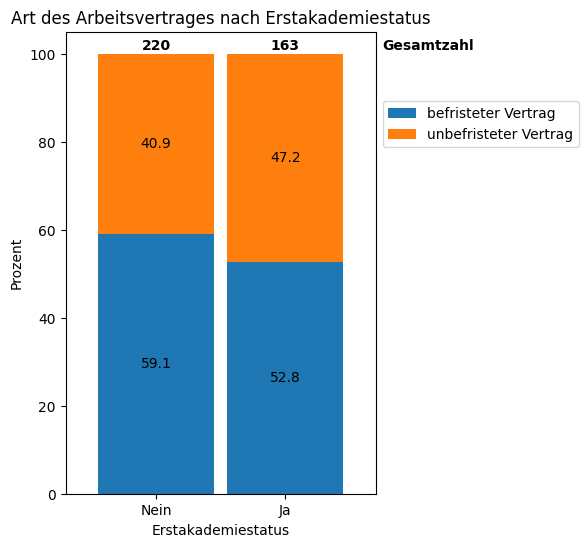

In [25]:
ax = con_acad_df[con_acad_perc].plot(kind='bar', 
                                        stacked=True, 
                                        figsize=(4, 6), 
                                        rot=45, ylabel='Prozent', 
                                        width=0.9, 
                                        title='Art des Arbeitsvertrages nach Erstakademiestatus',
                                        xlabel='Erstakademiestatus'
                                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(con_acad_df['totals']):
    ax.text(con_acad_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.set_xticklabels(['Nein', 'Ja'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['befristeter Vertrag', 'unbefristeter Vertrag'])

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [26]:
fig = ax.get_figure()
fig.savefig('../reports/figures/M_02_Erstakademiker_vs_Arbeitsvertrag.png', bbox_inches='tight', dpi=300)

#### working contract vs first language German

In [27]:
con_lang_df, con_lang_perc = cross_analysis_non_one_hot('CO4. Ist\xa0Deutsch Ihre Erstsprache?', ls_cols_contract)

In [28]:
con_lang_df

,CO4. Ist Deutsch Ihre Erstsprache?,M9. Sind Sie momentan befristet beschäftigt? _1,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.",totals,M9. Sind Sie momentan befristet beschäftigt? _1Perc,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.Perc"
0,0.0,12,5,17,70.588235,29.411765
1,1.0,212,167,379,55.936675,44.063325


Text(1.02, 0.985, 'Gesamtzahl')

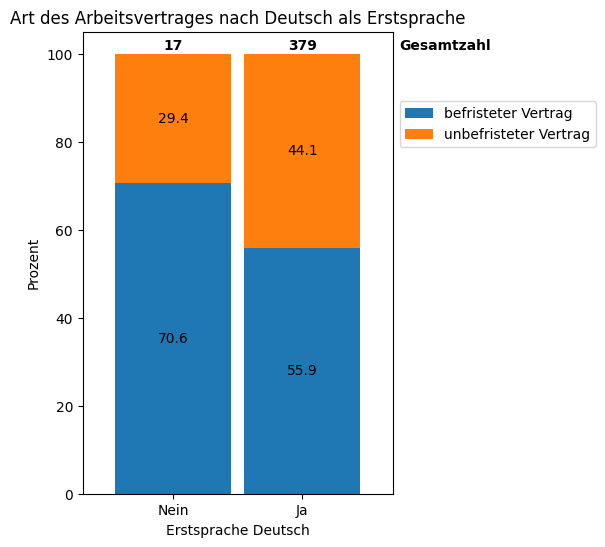

In [29]:
ax = con_lang_df[con_lang_perc].plot(kind='bar', 
                                        stacked=True, 
                                        figsize=(4, 6), 
                                        rot=45, ylabel='Prozent', 
                                        width=0.9, 
                                        title='Art des Arbeitsvertrages nach Deutsch als Erstsprache',
                                        xlabel='Erstsprache Deutsch'
                                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(con_lang_df['totals']):
    ax.text(con_lang_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.set_xticklabels(['Nein', 'Ja'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['befristeter Vertrag', 'unbefristeter Vertrag'])

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [30]:
fig = ax.get_figure()
fig.savefig('../reports/figures/M_03_Erstsprache_vs_Arbeitsvertrag.png', bbox_inches='tight', dpi=300)

## working contract vs gender

In [31]:
ls_cols_gender = [col for col in df_whole if col.startswith('CO6.')]

con_gender_df, con_gender_perc = cross_analysis_one_hot(ls_cols_gender, ls_cols_contract)
con_gender_df

,M9. Sind Sie momentan befristet beschäftigt? _1,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.",totals,M9. Sind Sie momentan befristet beschäftigt? _1Percentage,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.Percentage"
CO6. Welchem Geschlecht ordnen Sie sich zu?_Divers,1,0,1,100.00000,0.00000
CO6. Welchem Geschlecht ordnen Sie sich zu?_Männlich,28,43,71,39.43662,60.56338
CO6. Welchem Geschlecht ordnen Sie sich zu?_Weiblich,194,129,323,60.06192,39.93808


In [32]:
gender_levels = ['Divers', 'Männlich', 'Weiblich']

Text(1.02, 0.985, 'Gesamtzahl')

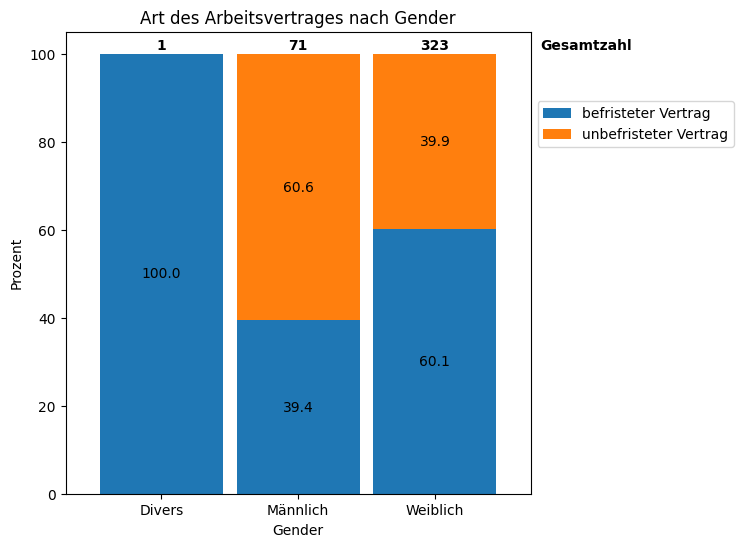

In [33]:
ax = con_gender_df[con_gender_perc].plot(kind='bar', 
                                        stacked=True, 
                                        figsize=(6, 6), 
                                        rot=45, ylabel='Prozent', 
                                        width=0.9, 
                                        title='Art des Arbeitsvertrages nach Gender',
                                        xlabel='Gender'
                                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(con_gender_df['totals']):
    ax.text(con_gender_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.set_xticklabels(gender_levels, rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['befristeter Vertrag', 'unbefristeter Vertrag'])

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [34]:
fig = ax.get_figure()
fig.savefig('../reports/figures/M_04_Gender_vs_Arbeitsvertrag.png', bbox_inches='tight', dpi=300)

## bullying vs career type

In [35]:
#extract columns with career and bullying
ls_cols_career = [col for col in df_whole if col.startswith('AP14')]
ls_cols_bullying = [col for col in df_whole if col.startswith('CO7r')]

#extract career levels
career = [entry.split('Fragen:\xa0_')[1] for entry in ls_cols_career]
print(career)
print(ls_cols_career)

#extract bullying levels
# Regular expression to find a string inside square brackets at the end of column
pattern = re.compile(r'\[([^\]]*)\]$')
bullying_levels = [pattern.search(col).group(1) if pattern.search(col) else None for col in ls_cols_bullying]
print(bullying_levels)

['Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit', 'Freiberufler:in', 'Freie Wirtschaft', 'Museums- oder Ausstellungswesen und Denkmalpflege', 'Stipendiat:in', 'Universität, Hochschule oder außeruniversitäre Forschungseinrichtung']
['AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.\xa0  Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen:\xa0_Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit', 'AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.\xa0  Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für S

In [36]:
car_bul_df, car_bul_perc = cross_analysis_non_one_hot('CO7. Werden oder wurden Sie im beruflichen Umfeld diskriminiert, abgewertet, gemobbt oder ohne sachliche Rechtfertigung benachteiligt?\xa0\xa0',
                                                      ls_cols_career,
                                                      transpose=True)

In [37]:
car_bul_df

,"CO7. Werden oder wurden Sie im beruflichen Umfeld diskriminiert, abgewertet, gemobbt oder ohne sachliche Rechtfertigung benachteiligt? _0.0_sum","CO7. Werden oder wurden Sie im beruflichen Umfeld diskriminiert, abgewertet, gemobbt oder ohne sachliche Rechtfertigung benachteiligt? _1.0_sum",totals,"CO7. Werden oder wurden Sie im beruflichen Umfeld diskriminiert, abgewertet, gemobbt oder ohne sachliche Rechtfertigung benachteiligt? _0.0_sumPerc","CO7. Werden oder wurden Sie im beruflichen Umfeld diskriminiert, abgewertet, gemobbt oder ohne sachliche Rechtfertigung benachteiligt? _1.0_sumPerc"
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit",33.0,37.0,70.0,47.142857,52.857143
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",58.0,48.0,106.0,54.716981,45.283019
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",30.0,14.0,44.0,68.181818,31.818182
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege",252.0,122.0,374.0,67.379679,32.620321
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in",25.0,17.0,42.0,59.523810,40.476190
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",172.0,97.0,269.0,63.940520,36.059480


Text(1.02, 0.985, 'Gesamtzahl')

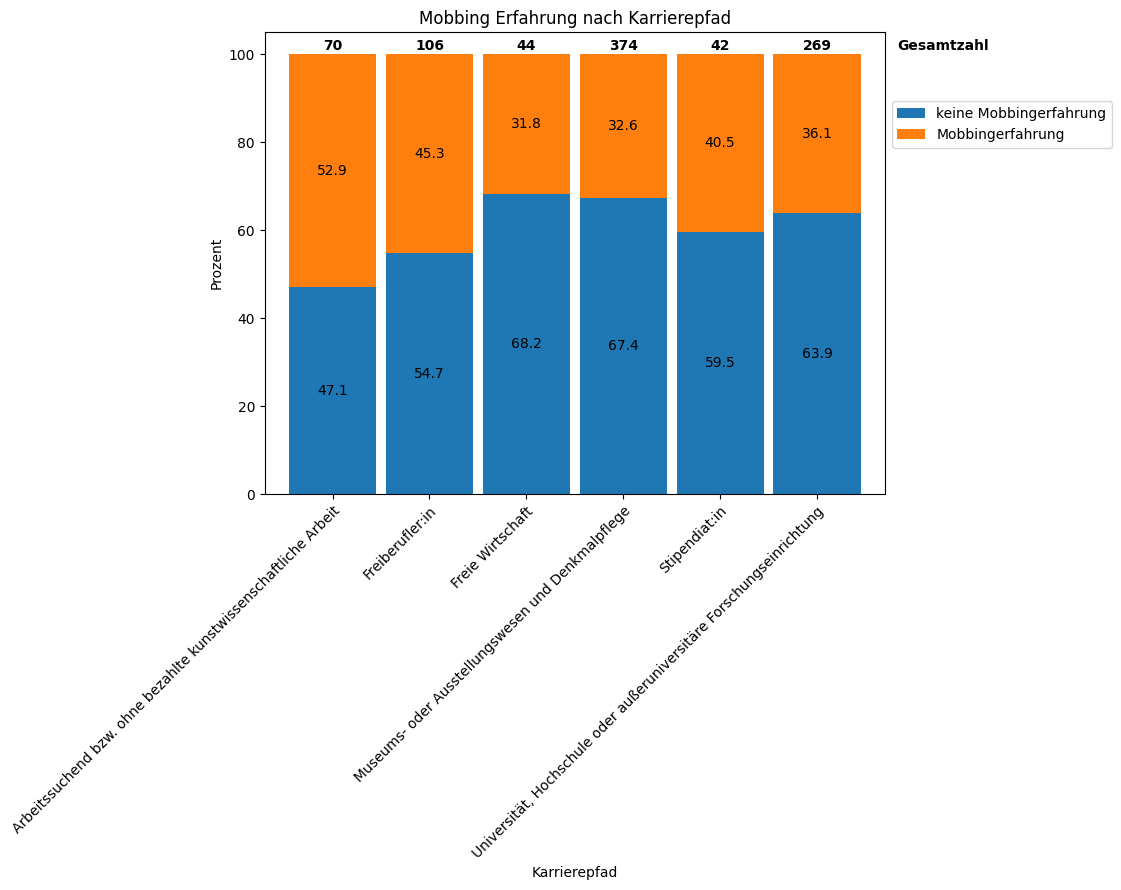

In [38]:
ax = car_bul_df[car_bul_perc].plot(kind='bar', 
                                    stacked=True, 
                                    figsize=(8, 6),                                                                                        
                                    ylabel='Prozent',
                                    xlabel='Karrierepfad',
                                    width=0.9,
                                    title='Mobbing Erfahrung nach Karrierepfad'
                                    )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(career, rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['keine Mobbingerfahrung', 'Mobbingerfahrung'])
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(car_bul_df['totals']):
    ax.text(car_bul_df['totals'].reset_index().index[i], y= 101, s = int(total), ha='center',
    weight='bold')

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [39]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AP_00_Pfad_vs_Mobbing.png', bbox_inches='tight', dpi=300)

In [40]:
ls_cols_bullying

['CO7r[SQ001]. Aus welchen Gründen? [Abschluss oder akademischer Grad]',
 'CO7r[SQ002]. Aus welchen Gründen? [Alter ]',
 'CO7r[SQ003]. Aus welchen Gründen? [Beeinträchtigung bzw. chronische Krankheit ]',
 'CO7r[SQ004]. Aus welchen Gründen? [Care-Verpflichtungen: Kinder]',
 'CO7r[SQ005]. Aus welchen Gründen? [Care-Verpflichtungen: pflegebedürftige Angehörige]',
 'CO7r[SQ006]. Aus welchen Gründen? [Erstsprache ]',
 'CO7r[SQ007]. Aus welchen Gründen? [Geschlecht bzw. Geschlechtsidentität]',
 'CO7r[SQ008]. Aus welchen Gründen? [Klasse (z.B. Erstakademiker:in)]',
 'CO7r[SQ009]. Aus welchen Gründen? [Konkurrenzkämpfe]',
 'CO7r[SQ010]. Aus welchen Gründen? [Rassifizierende Zuschreibung]',
 'CO7r[SQ011]. Aus welchen Gründen? [Religion bzw. Weltanschauung (inklusive Zuschreibungen)]',
 'CO7r[SQ012]. Aus welchen Gründen? [Sexuelle Identität bzw. Orientierung (inklusive Zuschreibungen)]',
 'CO7r[SQ013]. Aus welchen Gründen? [Staatsangehörigkeit]']

### bullying types vs career paths

In [41]:
car_bul_types_df, car_bul_types_perc = cross_analysis_one_hot(ls_cols_career, ls_cols_bullying)

In [42]:
car_bul_types_df

,CO7r[SQ001]. Aus welchen Gründen? [Abschluss oder akademischer Grad],CO7r[SQ002]. Aus welchen Gründen? [Alter ],CO7r[SQ003]. Aus welchen Gründen? [Beeinträchtigung bzw. chronische Krankheit ],CO7r[SQ004]. Aus welchen Gründen? [Care-Verpflichtungen: Kinder],CO7r[SQ005]. Aus welchen Gründen? [Care-Verpflichtungen: pflegebedürftige Angehörige],CO7r[SQ006]. Aus welchen Gründen? [Erstsprache ],CO7r[SQ007]. Aus welchen Gründen? [Geschlecht bzw. Geschlechtsidentität],CO7r[SQ008]. Aus welchen Gründen? [Klasse (z.B. Erstakademiker:in)],CO7r[SQ009]. Aus welchen Gründen? [Konkurrenzkämpfe],CO7r[SQ010]. Aus welchen Gründen? [Rassifizierende Zuschreibung],...,CO7r[SQ004]. Aus welchen Gründen? [Care-Verpflichtungen: Kinder]Percentage,CO7r[SQ005]. Aus welchen Gründen? [Care-Verpflichtungen: pflegebedürftige Angehörige]Percentage,CO7r[SQ006]. Aus welchen Gründen? [Erstsprache ]Percentage,CO7r[SQ007]. Aus welchen Gründen? [Geschlecht bzw. Geschlechtsidentität]Percentage,CO7r[SQ008]. Aus welchen Gründen? [Klasse (z.B. Erstakademiker:in)]Percentage,CO7r[SQ009]. Aus welchen Gründen? [Konkurrenzkämpfe]Percentage,CO7r[SQ010]. Aus welchen Gründen? [Rassifizierende Zuschreibung]Percentage,CO7r[SQ011]. Aus welchen Gründen? [Religion bzw. Weltanschauung (inklusive Zuschreibungen)]Percentage,CO7r[SQ012]. Aus welchen Gründen? [Sexuelle Identität bzw. Orientierung (inklusive Zuschreibungen)]Percentage,CO7r[SQ013]. Aus welchen Gründen? [Staatsangehörigkeit]Percentage
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit",5,11,3,7,2,3,18,10,19,3,...,7.954545,2.272727,3.409091,20.454545,11.363636,21.590909,3.409091,2.272727,3.409091,2.272727
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",14,11,1,13,2,0,20,10,37,2,...,11.304348,1.739130,0.000000,17.391304,8.695652,32.173913,1.739130,1.739130,0.869565,1.739130
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",2,1,0,3,1,0,4,2,7,0,...,12.500000,4.166667,0.000000,16.666667,8.333333,29.166667,0.000000,0.000000,12.500000,4.166667
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege",27,35,4,13,1,3,58,18,77,5,...,5.098039,0.392157,1.176471,22.745098,7.058824,30.196078,1.960784,1.176471,1.176471,3.137255
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in",2,7,0,5,0,2,8,5,9,2,...,11.904762,0.000000,4.761905,19.047619,11.904762,21.428571,4.761905,0.000000,2.380952,2.380952
"AP14. Wir möchten im Folgenden ge

Text(1.02, 0.5, 'Mehrfachnennung waren möglich')

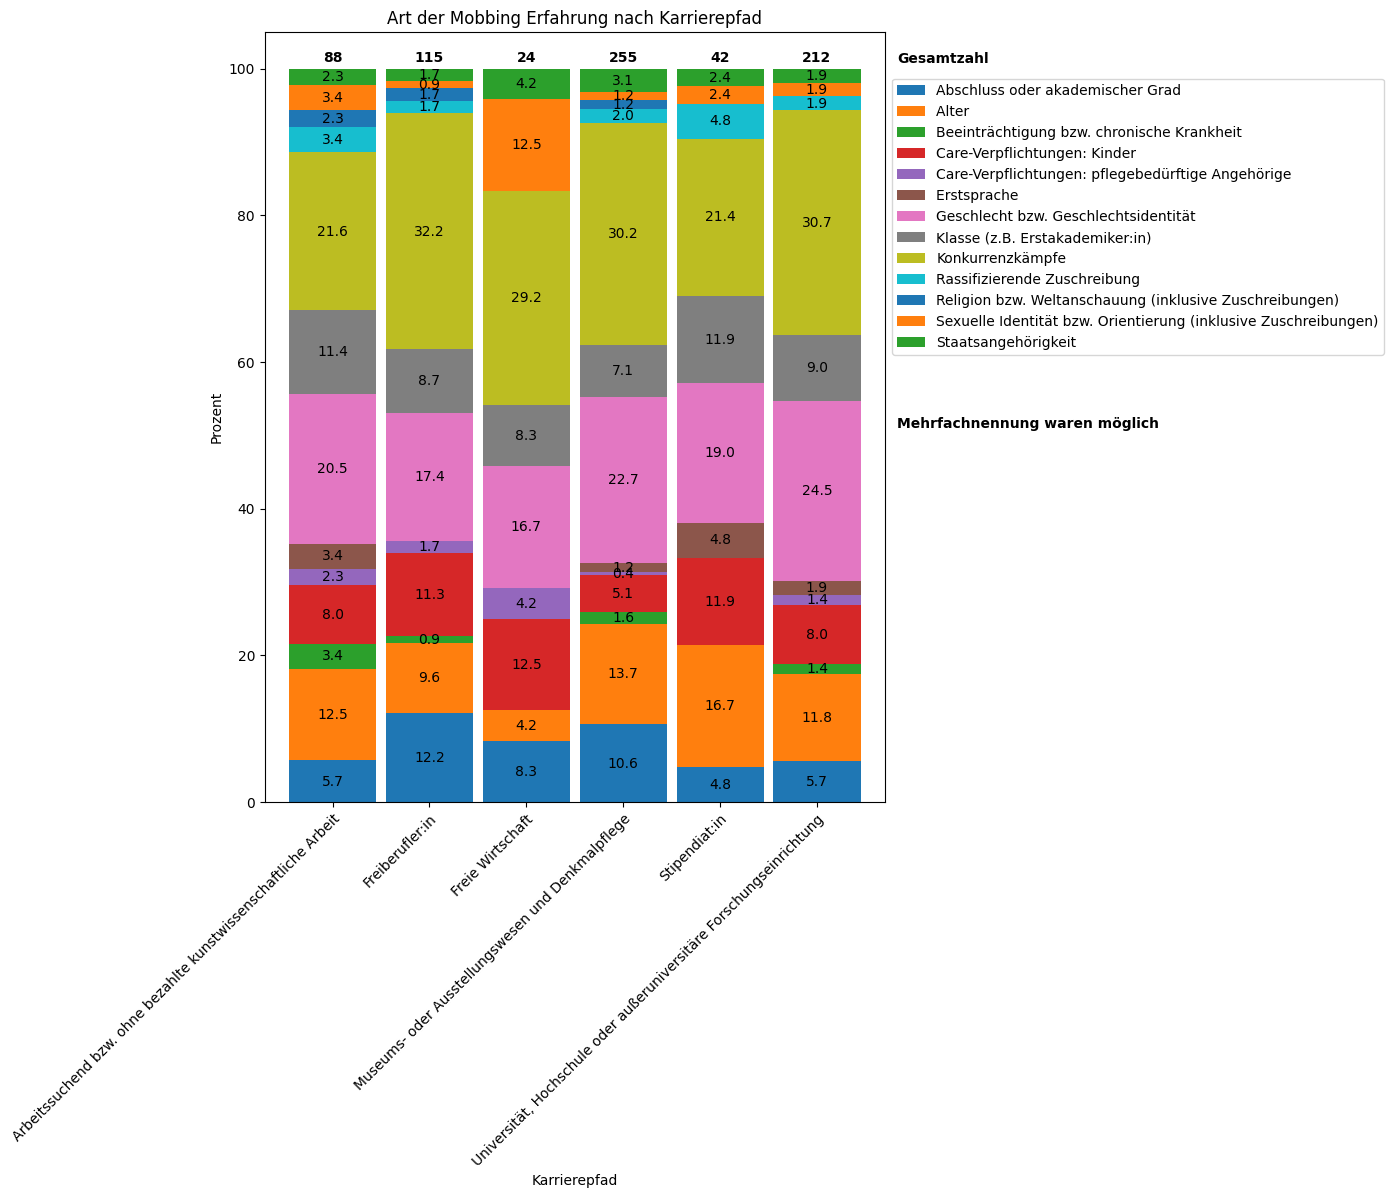

In [43]:
ax = car_bul_types_df[car_bul_types_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(8, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        xlabel='Karrierepfad',
                        width=0.9,
                        title='Art der Mobbing Erfahrung nach Karrierepfad'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(career, rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=bullying_levels)

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(car_bul_types_df['totals']):
    ax.text(car_bul_types_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')
ax.text(1.02, 0.5, 'Mehrfachnennung waren möglich', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [44]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AP_01_Pfad_vs_Mobbingarten.png', bbox_inches='tight', dpi=300)

Hypothesis: Stipendholders report more often mobbing based on their first language (CO4) and class (CO1) because there are more non-native speaker and first time academics among them. 

### career vs. first language

In [45]:
car_lang_df, car_lang_perc = cross_analysis_non_one_hot('CO4. Ist\xa0Deutsch Ihre Erstsprache?', ls_cols_career, transpose=True)

In [46]:
car_lang_df

,CO4. Ist Deutsch Ihre Erstsprache?_0.0_sum,CO4. Ist Deutsch Ihre Erstsprache?_1.0_sum,totals,CO4. Ist Deutsch Ihre Erstsprache?_0.0_sumPerc,CO4. Ist Deutsch Ihre Erstsprache?_1.0_sumPerc
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit",6.0,68.0,74.0,8.108108,91.891892
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",6.0,107.0,113.0,5.309735,94.690265
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",2.0,44.0,46.0,4.347826,95.652174
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege",17.0,384.0,401.0,4.239401,95.760599
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in",4.0,40.0,44.0,9.090909,90.909091
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",24.0,265.0,289.0,8.304498,91.695502


In [47]:
car_lang_perc.sort(reverse=True)

In [48]:
car_lang_perc

['CO4. Ist\xa0Deutsch Ihre Erstsprache?_1.0_sumPerc',
 'CO4. Ist\xa0Deutsch Ihre Erstsprache?_0.0_sumPerc']

Text(1.02, 0.985, 'Gesamtzahl')

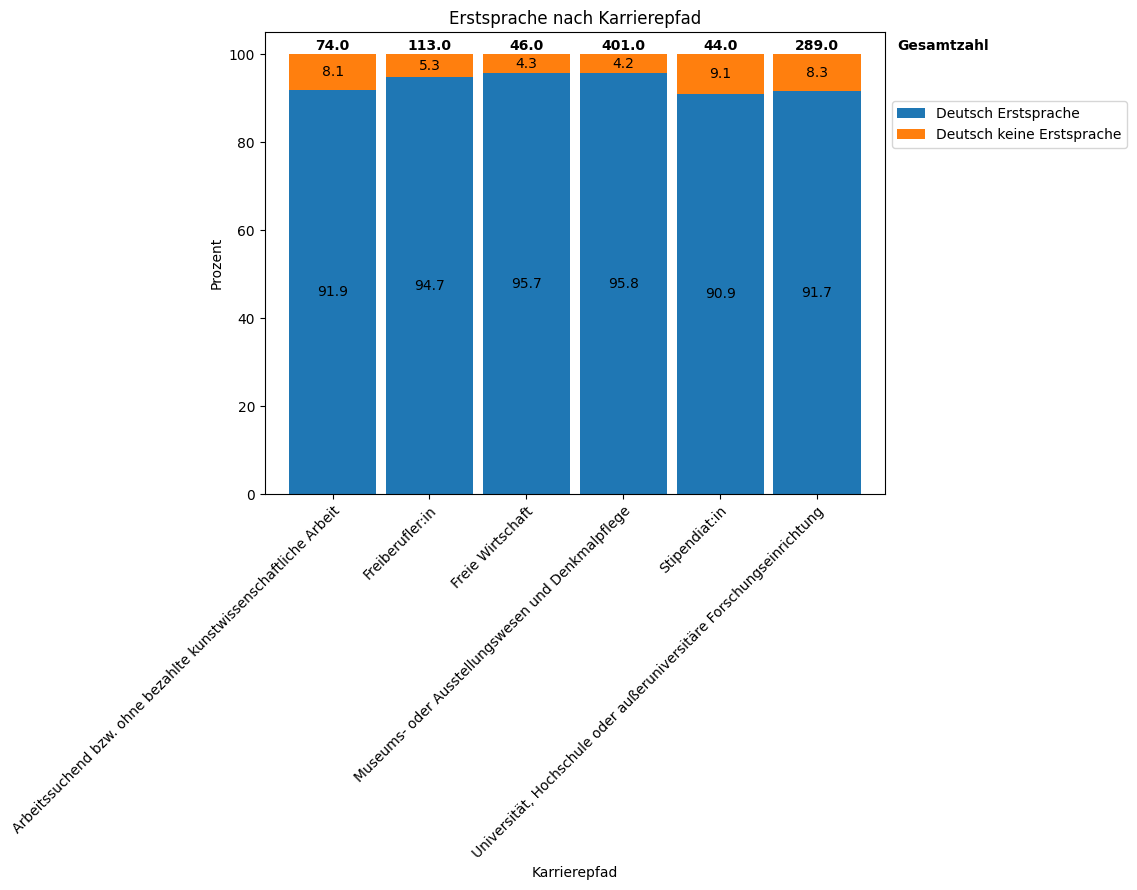

In [49]:
ax = car_lang_df[car_lang_perc].plot(kind='bar', 
                                                                                          stacked=True, 
                                                                                          figsize=(8, 6),                                                                                        
                                                                                          #rot=45,
                                                                                          ylabel='Prozent',
                                                                                          xlabel='Karrierepfad',
                                                                                          width=0.9,
                                                                                          title='Erstsprache nach Karrierepfad'
                                                                                          )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(career, rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['Deutsch Erstsprache', 'Deutsch keine Erstsprache'])
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(car_lang_df['totals']):
    ax.text(car_lang_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [50]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AP_02_Pfad_vs_Erstsprache.png', bbox_inches='tight', dpi=300)

Yes stipend holders have the highest percentage of non-native german speaking individuals. However it's not significantly more than the population of individuals working in universities and non-university academic institutions. This does not explain why stipend holders face more bullying based on their native language.

### career vs. family background

In [51]:
car_fam_df, car_fam_perc = cross_analysis_non_one_hot('CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?', ls_cols_career, transpose=True)

In [52]:
car_fam_df

,CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?_0.0_sum,CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?_1.0_sum,totals,CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?_0.0_sumPerc,CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?_1.0_sumPerc
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit",40.0,34.0,74.0,54.054054,45.945946
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",60.0,51.0,111.0,54.054054,45.945946
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",24.0,21.0,45.0,53.333333,46.666667
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege",221.0,167.0,388.0,56.958763,43.041237
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in",20.0,25.0,45.0,44.444444,55.555556
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",160.0,117.0,277.0,57.761733,42.238267


Text(1.02, 0.985, 'Gesamtzahl')

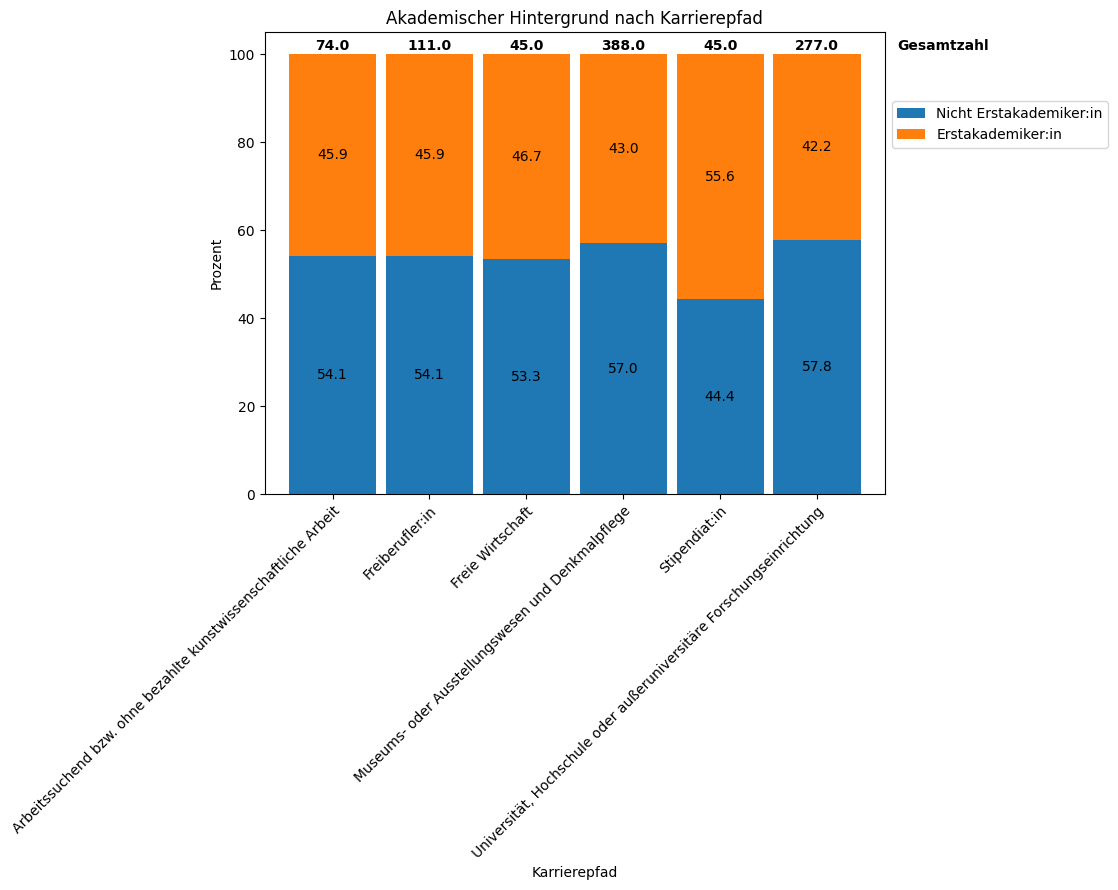

In [53]:
ax = car_fam_df[car_fam_perc].plot(kind='bar', 
                                                                                          stacked=True, 
                                                                                          figsize=(8, 6),                                                                                        
                                                                                          #rot=45,
                                                                                          ylabel='Prozent',
                                                                                          xlabel='Karrierepfad',
                                                                                          width=0.9,
                                                                                          title='Akademischer Hintergrund nach Karrierepfad'
                                                                                          )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(career, rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['Nicht Erstakademiker:in', 'Erstakademiker:in'])
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(car_fam_df['totals']):
    ax.text(car_fam_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [54]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AP_03_Pfad_vs_Erstakademie.png', bbox_inches='tight', dpi=300)

There are indeed ~ 10% more stipend holders that report to be first in their families to have an academic degree. This could explain why there are more reported cases of classism within stipend holders.

### Career vs. Age Group

In [55]:
car_age_df, car_age_perc = cross_analysis_one_hot(ls_cols_career, ls_cols_age_level)

In [56]:
car_age_df

,AP1. Wie alt sind Sie?_0.0,AP1. Wie alt sind Sie?_1.0,AP1. Wie alt sind Sie?_2.0,AP1. Wie alt sind Sie?_3.0,AP1. Wie alt sind Sie?_4.0,AP1. Wie alt sind Sie?_5.0,AP1. Wie alt sind Sie?_6.0,AP1. Wie alt sind Sie?_7.0,AP1. Wie alt sind Sie?_8.0,AP1. Wie alt sind Sie?_9.0,...,AP1. Wie alt sind Sie?_1.0Percentage,AP1. Wie alt sind Sie?_2.0Percentage,AP1. Wie alt sind Sie?_3.0Percentage,AP1. Wie alt sind Sie?_4.0Percentage,AP1. Wie alt sind Sie?_5.0Percentage,AP1. Wie alt sind Sie?_6.0Percentage,AP1. Wie alt sind Sie?_7.0Percentage,AP1. Wie alt sind Sie?_8.0Percentage,AP1. Wie alt sind Sie?_9.0Percentage,AP1. Wie alt sind Sie?_10.0Percentage
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit",0,7,23,22,7,3,8,2,1,1,...,9.459459,31.081081,29.729730,9.459459,4.054054,10.810811,2.702703,1.351351,1.351351,0.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",1,7,19,11,16,16,18,13,8,2,...,6.250000,16.964286,9.821429,14.285714,14.285714,16.071429,11.607143,7.142857,1.785714,0.892857
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",1,3,13,7,12,3,4,3,1,1,...,6.250000,27.083333,14.583333,25.000000,6.250000,8.333333,6.250000,2.083333,2.083333,0.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege",4,49,110,78,62,33,15,26,12,2,...,12.436548,27.918782,19.796954,15.736041,8.375635,3.807107,6.598985,3.045685,0.507614,0.761421
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in",1,8,26,7,3,0,0,0,0,0,...,17.777778,57.777778,15.555556,6.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",2,31,70,66,45,26,17,14,7,2,...,11.032028,24.911032,23.487544,16.014235,9.252669,6.049822,4.982206,2.491103,0.711744,0.355872


Text(1.02, 0.975, 'Gesamtzahl')

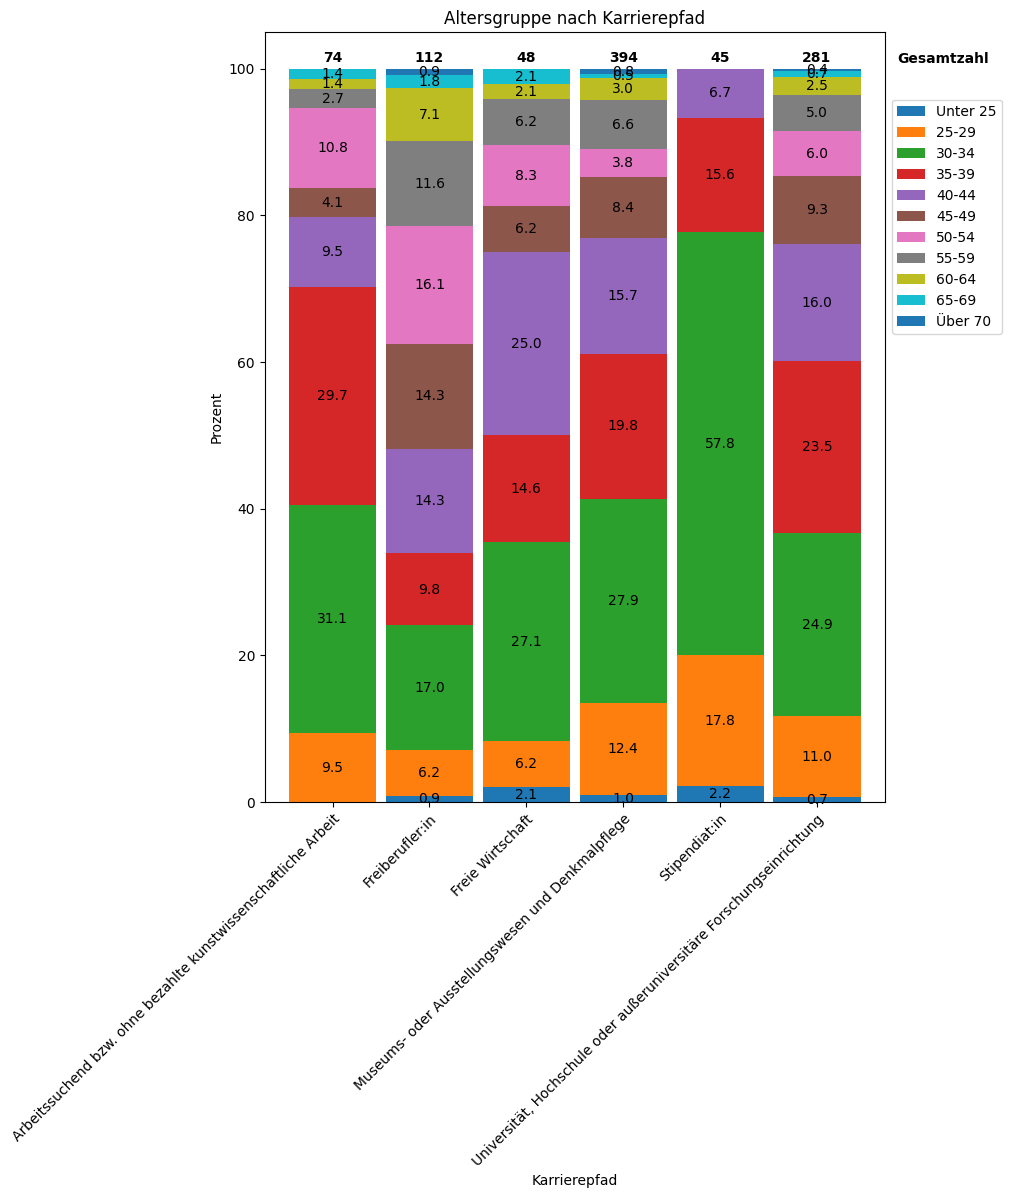

In [57]:
ax = car_age_df[car_age_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(8, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        xlabel='Karrierepfad',
                        width=0.9,
                        title='Altersgruppe nach Karrierepfad'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(career, rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=decoded_age_level)

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(car_age_df['totals']):
    ax.text(car_age_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [58]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AP_04_Pfad_vs_Alter.png', bbox_inches='tight', dpi=300)

* Karrierepfad vs Geschlecht
* Karrierepfad vs Kinder

In [59]:
car_gender_df, car_gender_perc = cross_analysis_one_hot(ls_cols_career, ls_cols_gender)

Text(1.02, 0.975, 'Gesamtzahl')

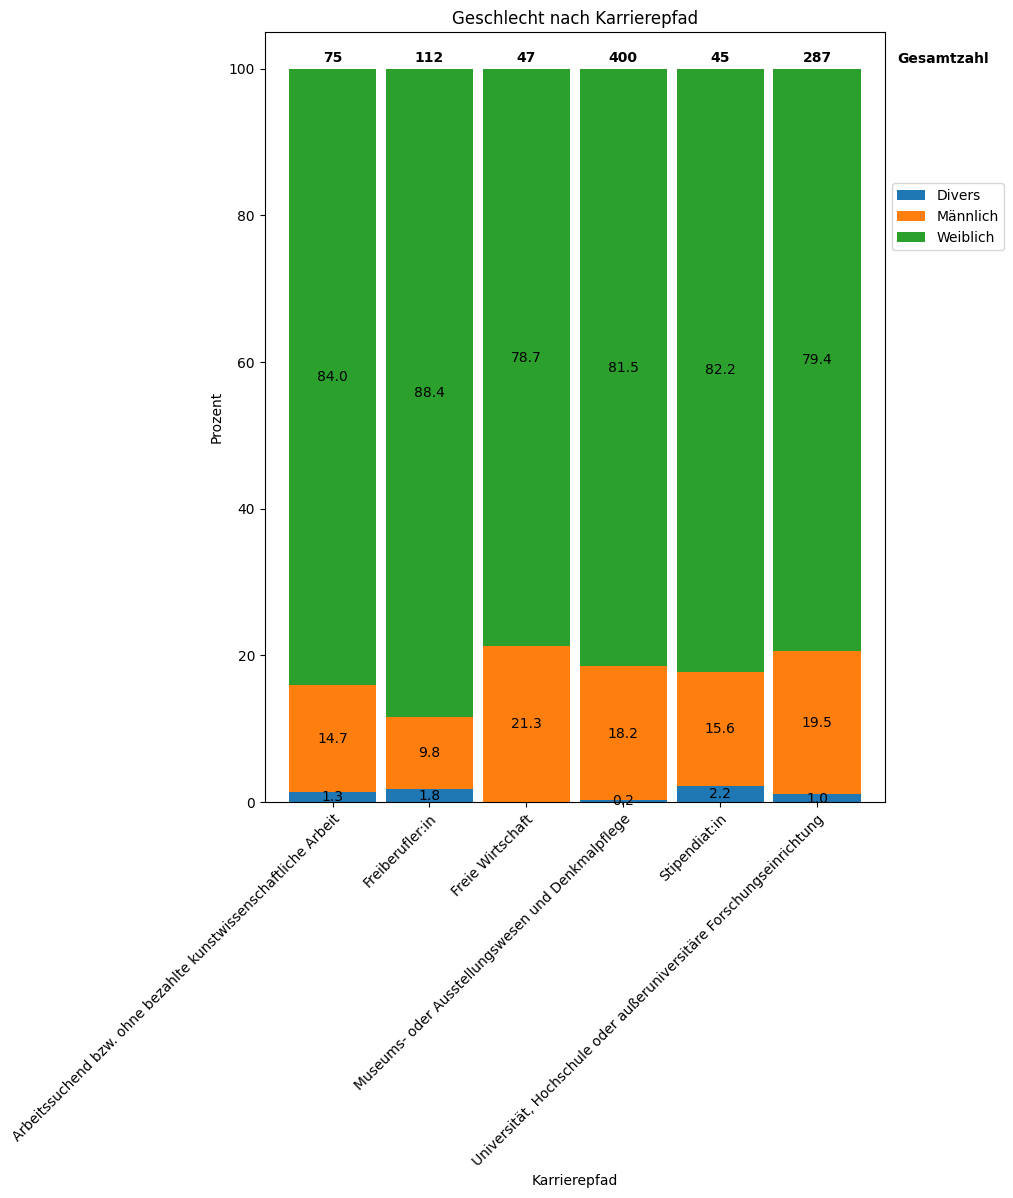

In [60]:
ax = car_gender_df[car_gender_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(8, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        xlabel='Karrierepfad',
                        width=0.9,
                        title='Geschlecht nach Karrierepfad'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(career, rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=gender_levels)

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(car_gender_df['totals']):
    ax.text(car_gender_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [61]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AP_05_Pfad_vs_Gender.png', bbox_inches='tight', dpi=300)

### Career vs having Childs

In [62]:
car_kids_df, car_kids_perc = cross_analysis_non_one_hot('CO2[SQ002]. Übernehmen Sie Betreuungsverantwortung? [Kind bzw. Kinder]', ls_cols_career, transpose=True)

In [63]:
car_kids_df

,CO2[SQ002]. Übernehmen Sie Betreuungsverantwortung? [Kind bzw. Kinder]_0_sum,CO2[SQ002]. Übernehmen Sie Betreuungsverantwortung? [Kind bzw. Kinder]_1_sum,totals,CO2[SQ002]. Übernehmen Sie Betreuungsverantwortung? [Kind bzw. Kinder]_0_sumPerc,CO2[SQ002]. Übernehmen Sie Betreuungsverantwortung? [Kind bzw. Kinder]_1_sumPerc
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit",53,22,75,70.666667,29.333333
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",69,46,115,60.000000,40.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",33,15,48,68.750000,31.250000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege",286,117,403,70.967742,29.032258
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in",35,10,45,77.777778,22.222222
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",201,88,289,69.550173,30.449827


Text(1.02, 0.975, 'Gesamtzahl')

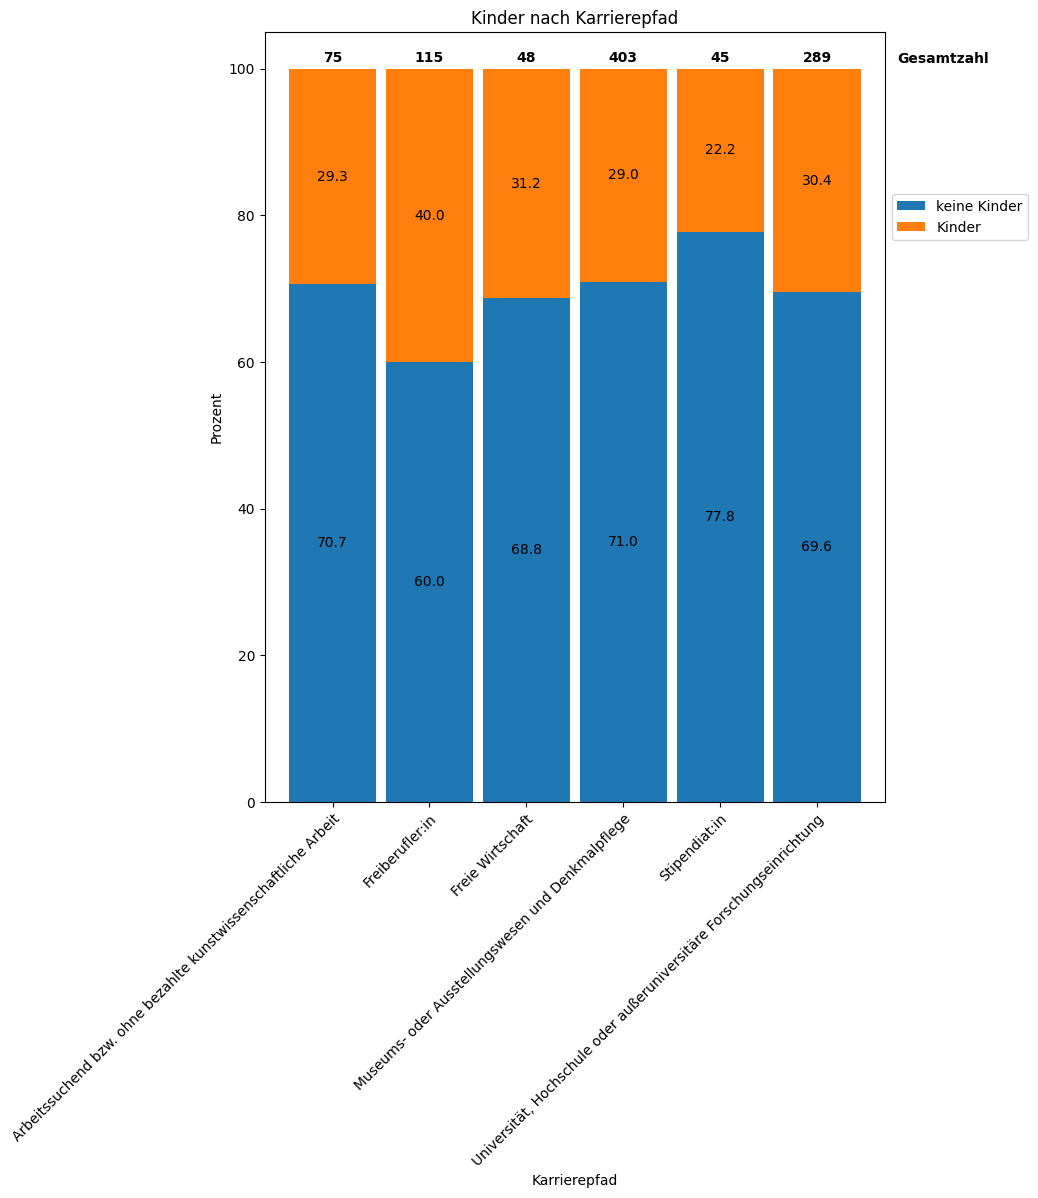

In [64]:
ax = car_kids_df[car_kids_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(8, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        xlabel='Karrierepfad',
                        width=0.9,
                        title='Kinder nach Karrierepfad'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(career, rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=['keine Kinder', 'Kinder'])

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(car_kids_df['totals']):
    ax.text(car_kids_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [65]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AP_06_Pfad_vs_Kinder.png', bbox_inches='tight', dpi=300)

## random visualizations based on correlation analysis

### People out of job

In [66]:
ls_cols_career[0]

'AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.\xa0  Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen:\xa0_Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit'

In [67]:
AS_career = ls_cols_career[0]

In [68]:
ls_qual_AS = [col for col in df_whole if col.startswith('AS7.')]
ls_qual_AS

['AS7. War der Qualifikationsgrad Grund dafür, dass Sie arbeitssuchend sind bzw. nicht weiterbeschäftigt werden konnten?_Ja, mit einer höheren Qualifikation hätte ich entfristet werden können.',
 'AS7. War der Qualifikationsgrad Grund dafür, dass Sie arbeitssuchend sind bzw. nicht weiterbeschäftigt werden konnten?_Nein, meine Qualifikation war nicht ausschlaggebend.',
 'AS7. War der Qualifikationsgrad Grund dafür, dass Sie arbeitssuchend sind bzw. nicht weiterbeschäftigt werden konnten?_Sonstiges']

In [69]:
AS_qual_df, AS_qual_perc = cross_analysis_one_hot([AS_career], ls_qual_AS)
AS_qual_df

,"AS7. War der Qualifikationsgrad Grund dafür, dass Sie arbeitssuchend sind bzw. nicht weiterbeschäftigt werden konnten?_Ja, mit einer höheren Qualifikation hätte ich entfristet werden können.","AS7. War der Qualifikationsgrad Grund dafür, dass Sie arbeitssuchend sind bzw. nicht weiterbeschäftigt werden konnten?_Nein, meine Qualifikation war nicht ausschlaggebend.","AS7. War der Qualifikationsgrad Grund dafür, dass Sie arbeitssuchend sind bzw. nicht weiterbeschäftigt werden konnten?_Sonstiges",totals,"AS7. War der Qualifikationsgrad Grund dafür, dass Sie arbeitssuchend sind bzw. nicht weiterbeschäftigt werden konnten?_Ja, mit einer höheren Qualifikation hätte ich entfristet werden können.Percentage","AS7. War der Qualifikationsgrad Grund dafür, dass Sie arbeitssuchend sind bzw. nicht weiterbeschäftigt werden konnten?_Nein, meine Qualifikation war nicht ausschlaggebend.Percentage","AS7. War der Qualifikationsgrad Grund dafür, dass Sie arbeitssuchend sind bzw. nicht weiterbeschäftigt werden konnten?_SonstigesPercentage"
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit",2,58,4,64,3.125,90.625,6.25


Text(1.02, 0.975, 'Gesamtzahl')

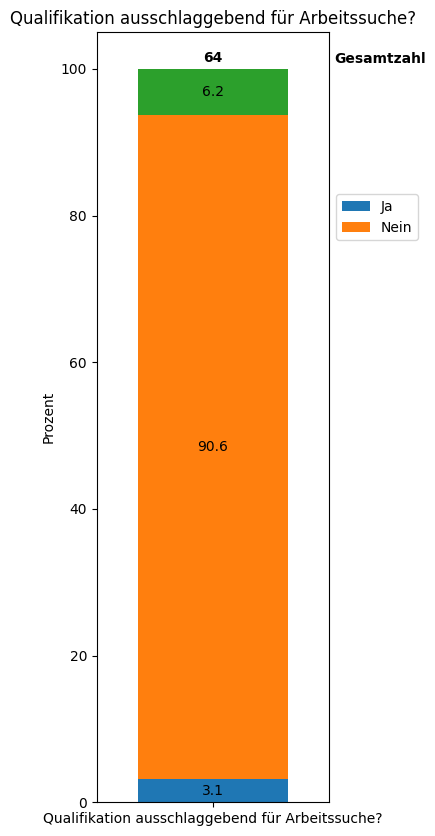

In [70]:
ax = AS_qual_df[AS_qual_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(3, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        #xlabel='Karrierepfad',
                        width=0.9,
                        title='Qualifikation ausschlaggebend für Arbeitssuche?'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(['Qualifikation ausschlaggebend für Arbeitssuche?'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=['Ja', 'Nein'])

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(AS_qual_df['totals']):
    ax.text(AS_qual_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [71]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AS_00_Qualifikation_nicht_ausschlaggebend.png', bbox_inches='tight', dpi=300)

### Freelancer

In [72]:
ls_cols_career[1]

'AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.\xa0  Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen:\xa0_Freiberufler:in'

In [73]:
F_career = ls_cols_career[1]
ls_small_business_F = [col for col in df_whole if col.startswith('F10.')]
ls_small_business_F

['F10. Nehmen Sie aktuell die Kleinunternehmerregelung nach § 19 UStG in Anspruch?_0',
 'F10. Nehmen Sie aktuell die Kleinunternehmerregelung nach § 19 UStG in Anspruch?_1',
 'F10. Nehmen Sie aktuell die Kleinunternehmerregelung nach § 19 UStG in Anspruch?_Sonstiges']

In [74]:
small_business_F_df, small_business_F_perc = cross_analysis_one_hot([F_career], ls_small_business_F)
small_business_F_df

,F10. Nehmen Sie aktuell die Kleinunternehmerregelung nach § 19 UStG in Anspruch?_0,F10. Nehmen Sie aktuell die Kleinunternehmerregelung nach § 19 UStG in Anspruch?_1,F10. Nehmen Sie aktuell die Kleinunternehmerregelung nach § 19 UStG in Anspruch?_Sonstiges,totals,F10. Nehmen Sie aktuell die Kleinunternehmerregelung nach § 19 UStG in Anspruch?_0Percentage,F10. Nehmen Sie aktuell die Kleinunternehmerregelung nach § 19 UStG in Anspruch?_1Percentage,F10. Nehmen Sie aktuell die Kleinunternehmerregelung nach § 19 UStG in Anspruch?_SonstigesPercentage
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",40,66,5,111,36.036036,59.459459,4.504505


Text(1.02, 0.975, 'Gesamtzahl')

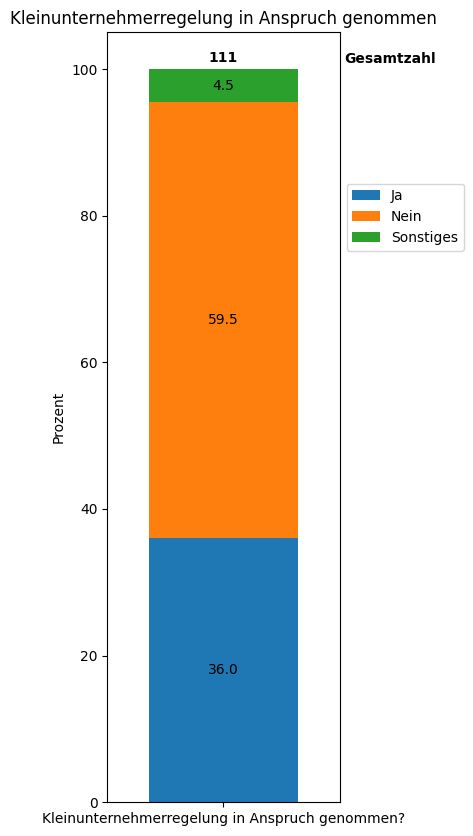

In [75]:
ax = small_business_F_df[small_business_F_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(3, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        #xlabel='Karrierepfad',
                        width=0.9,
                        title='Kleinunternehmerregelung in Anspruch genommen'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(['Kleinunternehmerregelung in Anspruch genommen?'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=['Ja', 'Nein', 'Sonstiges'])

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(small_business_F_df['totals']):
    ax.text(small_business_F_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [76]:
fig = ax.get_figure()
fig.savefig('../reports/figures/F_00_Kleinunternehmerregelung.png', bbox_inches='tight', dpi=300)

36% of all Freelancer report that they earned less than 22k € last year and will earn less than 50k € this year

In [77]:
ls_work_room_F = [col for col in df_whole if col.startswith('F2.')]
ls_work_room_F

['F2. Arbeitszimmer, Büro oder Geschäftsraum:_Außerhalb des Haushalts',
 'F2. Arbeitszimmer, Büro oder Geschäftsraum:_Innerhalb des Haushalts']

In [78]:
work_room_F_df,work_room_F_perc = cross_analysis_one_hot([F_career], ls_work_room_F)
work_room_F_df

,"F2. Arbeitszimmer, Büro oder Geschäftsraum:_Außerhalb des Haushalts","F2. Arbeitszimmer, Büro oder Geschäftsraum:_Innerhalb des Haushalts",totals,"F2. Arbeitszimmer, Büro oder Geschäftsraum:_Außerhalb des HaushaltsPercentage","F2. Arbeitszimmer, Büro oder Geschäftsraum:_Innerhalb des HaushaltsPercentage"
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",19,91,110,17.272727,82.727273


Text(1.02, 0.975, 'Gesamtzahl')

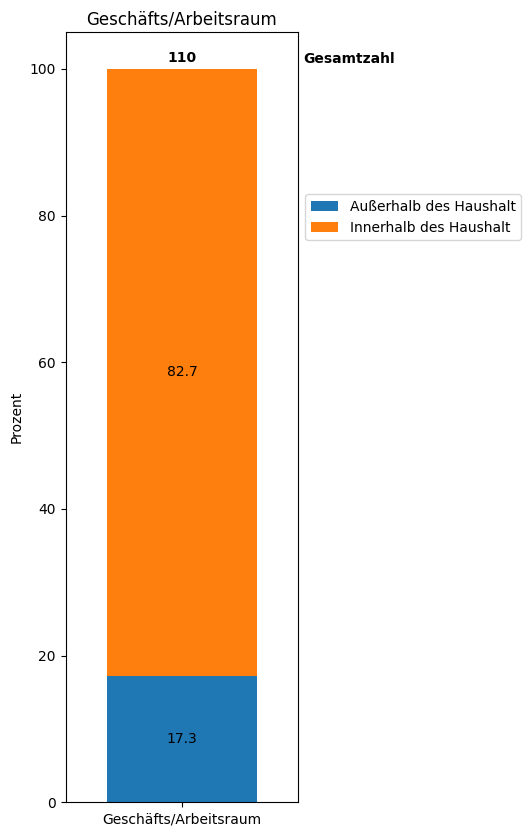

In [79]:
ax = work_room_F_df[work_room_F_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(3, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        #xlabel='Karrierepfad',
                        width=0.9,
                        title='Geschäfts/Arbeitsraum'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(['Geschäfts/Arbeitsraum'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=['Außerhalb des Haushalt', 'Innerhalb des Haushalt'])

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(work_room_F_df['totals']):
    ax.text(work_room_F_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [80]:
fig = ax.get_figure()
fig.savefig('../reports/figures/F_01_Arbeitsräume.png', bbox_inches='tight', dpi=300)

In [81]:
ls_security_F = [col for col in df_whole if col.startswith('F6.')]
ls_security_F

['F6. Wie sichern Sie sich finanziell, rechtlich und persönlich überwiegend ab?_Selbst',
 'F6. Wie sichern Sie sich finanziell, rechtlich und persönlich überwiegend ab?_Über andere (Mit- oder Vollfinanzierung)']

In [82]:
security_F_df, security_F_perc = cross_analysis_one_hot([F_career], ls_security_F)
security_F_df 

,"F6. Wie sichern Sie sich finanziell, rechtlich und persönlich überwiegend ab?_Selbst","F6. Wie sichern Sie sich finanziell, rechtlich und persönlich überwiegend ab?_Über andere (Mit- oder Vollfinanzierung)",totals,"F6. Wie sichern Sie sich finanziell, rechtlich und persönlich überwiegend ab?_SelbstPercentage","F6. Wie sichern Sie sich finanziell, rechtlich und persönlich überwiegend ab?_Über andere (Mit- oder Vollfinanzierung)Percentage"
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",84,25,109,77.06422,22.93578


Text(1.02, 0.975, 'Gesamtzahl')

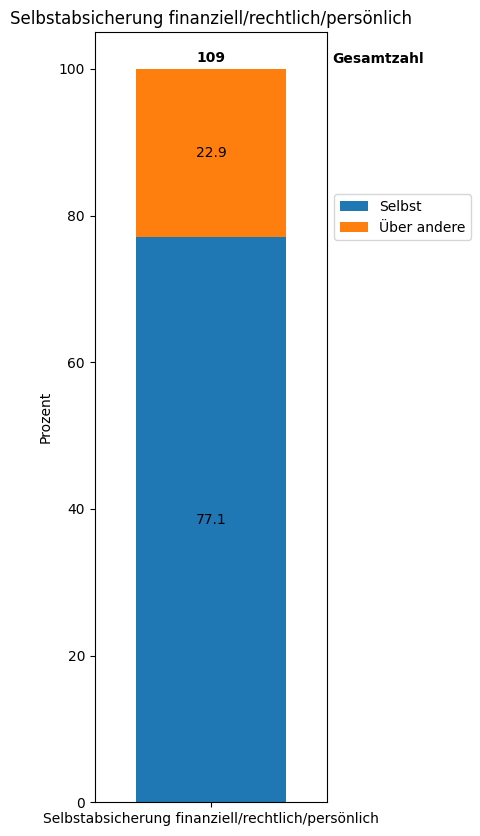

In [83]:
ax = security_F_df[security_F_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(3, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        #xlabel='Karrierepfad',
                        width=0.9,
                        title='Selbstabsicherung finanziell/rechtlich/persönlich'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(['Selbstabsicherung finanziell/rechtlich/persönlich'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=['Selbst', 'Über andere'])

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(security_F_df['totals']):
    ax.text(security_F_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [84]:
fig = ax.get_figure()
fig.savefig('../reports/figures/F_02_Absicherung.png', bbox_inches='tight', dpi=300)

### Freie Wirtschaft

In [85]:
W_career = ls_cols_career[2]
W_career

'AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.\xa0  Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen:\xa0_Freie Wirtschaft'

In [86]:
ls_works_council_W = [col for col in df_whole if col.startswith('W15.')]
ls_works_council_W

['W15. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten?\xa0_Ja\u202f',
 'W15. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten?\xa0_Nein\u202f',
 'W15. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten?\xa0_Unbekannt']

In [87]:
works_council_W_df, works_council_W_perc = cross_analysis_one_hot([W_career], ls_works_council_W)
works_council_W_df

,W15. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten? _Ja,W15. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten? _Nein,W15. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten? _Unbekannt,totals,W15. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten? _Ja Percentage,W15. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten? _Nein Percentage,W15. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten? _UnbekanntPercentage
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",15,30,2,47,31.914894,63.829787,4.255319


Text(1.02, 0.975, 'Gesamtzahl')

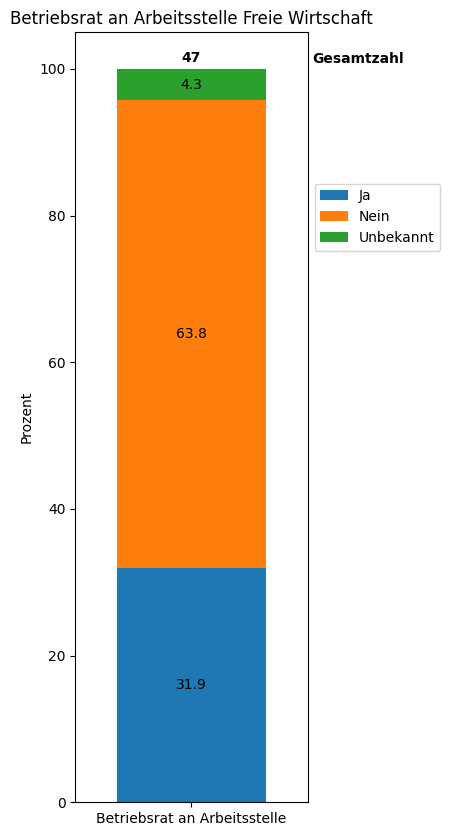

In [88]:
ax = works_council_W_df[works_council_W_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(3, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        #xlabel='Karrierepfad',
                        width=0.9,
                        title='Betriebsrat an Arbeitsstelle Freie Wirtschaft'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(['Betriebsrat an Arbeitsstelle'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=['Ja', 'Nein', 'Unbekannt'])

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(works_council_W_df['totals']):
    ax.text(works_council_W_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [89]:
fig = ax.get_figure()
fig.savefig('../reports/figures/W_00_Betriebsrat.png', bbox_inches='tight', dpi=300)

In [90]:
ls_diss_req_W = [col for col in df_whole if col.startswith('W5.')]
ls_diss_req_W

['W5. War eine Promotion Einstellungsvoraussetzung für Ihre derzeitige Stelle?_1',
 'W5. War eine Promotion Einstellungsvoraussetzung für Ihre derzeitige Stelle?_Nein, aber Promotion war gewünscht.',
 'W5. War eine Promotion Einstellungsvoraussetzung für Ihre derzeitige Stelle?_Nein, die Promotion war kein Einstellungskriterium.']

In [91]:
diss_req_W_df, diss_req_perc = cross_analysis_one_hot([W_career], ls_diss_req_W)
diss_req_W_df

,W5. War eine Promotion Einstellungsvoraussetzung für Ihre derzeitige Stelle?_1,"W5. War eine Promotion Einstellungsvoraussetzung für Ihre derzeitige Stelle?_Nein, aber Promotion war gewünscht.","W5. War eine Promotion Einstellungsvoraussetzung für Ihre derzeitige Stelle?_Nein, die Promotion war kein Einstellungskriterium.",totals,W5. War eine Promotion Einstellungsvoraussetzung für Ihre derzeitige Stelle?_1Percentage,"W5. War eine Promotion Einstellungsvoraussetzung für Ihre derzeitige Stelle?_Nein, aber Promotion war gewünscht.Percentage","W5. War eine Promotion Einstellungsvoraussetzung für Ihre derzeitige Stelle?_Nein, die Promotion war kein Einstellungskriterium.Percentage"
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",1,2,43,46,2.173913,4.347826,93.478261


Text(1.02, 0.975, 'Gesamtzahl')

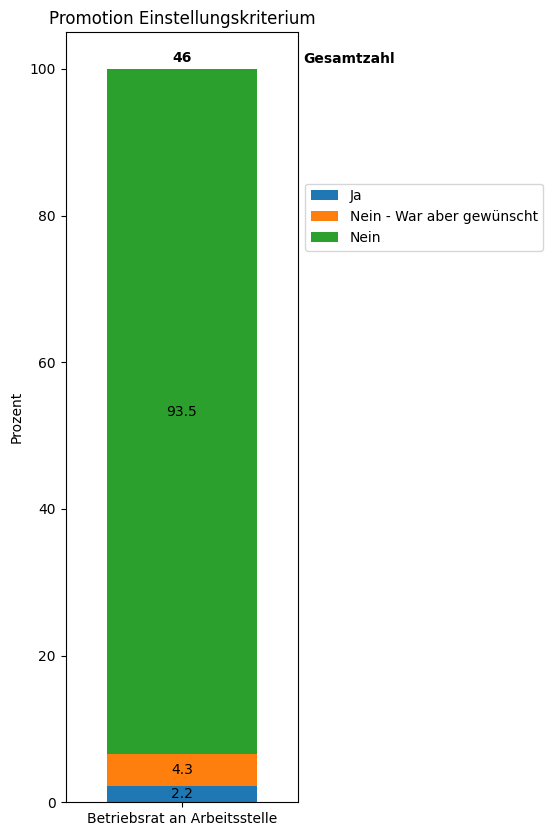

In [92]:
ax = diss_req_W_df[diss_req_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(3, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        #xlabel='Karrierepfad',
                        width=0.9,
                        title='Promotion Einstellungskriterium'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(['Betriebsrat an Arbeitsstelle'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=['Ja', 'Nein - War aber gewünscht', 'Nein'])

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(diss_req_W_df['totals']):
    ax.text(diss_req_W_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [93]:
fig = ax.get_figure()
fig.savefig('../reports/figures/W_01_Promotion_Einstellungsvoraussetzung.png', bbox_inches='tight', dpi=300)

In [94]:
ls_tarif_salary_W = [col for col in df_whole if col.startswith('W6.')]
ls_tarif_salary_W

['W6. Werden Sie nach einem Tarifvertrag bezahlt?_0',
 'W6. Werden Sie nach einem Tarifvertrag bezahlt?_1',
 'W6. Werden Sie nach einem Tarifvertrag bezahlt?_Sonstiges']

In [95]:
tarif_salary_W_df, tarif_salary_W_perc = cross_analysis_one_hot([W_career], ls_tarif_salary_W)
tarif_salary_W_df

,W6. Werden Sie nach einem Tarifvertrag bezahlt?_0,W6. Werden Sie nach einem Tarifvertrag bezahlt?_1,W6. Werden Sie nach einem Tarifvertrag bezahlt?_Sonstiges,totals,W6. Werden Sie nach einem Tarifvertrag bezahlt?_0Percentage,W6. Werden Sie nach einem Tarifvertrag bezahlt?_1Percentage,W6. Werden Sie nach einem Tarifvertrag bezahlt?_SonstigesPercentage
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",32,5,9,46,69.565217,10.869565,19.565217


Text(1.02, 0.975, 'Gesamtzahl')

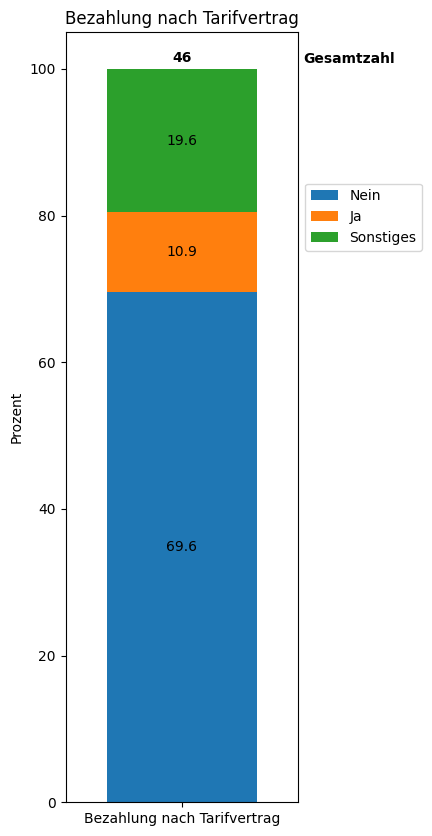

In [96]:
ax = tarif_salary_W_df[tarif_salary_W_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(3, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        #xlabel='Karrierepfad',
                        width=0.9,
                        title='Bezahlung nach Tarifvertrag'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(['Bezahlung nach Tarifvertrag'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=['Nein', 'Ja', 'Sonstiges'])

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(tarif_salary_W_df['totals']):
    ax.text(tarif_salary_W_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [97]:
fig = ax.get_figure()
fig.savefig('../reports/figures/W_02_Bezahlung_Tarifvertrag.png', bbox_inches='tight', dpi=300)

### Museum

In [98]:
M_career = ls_cols_career[3]
M_career

'AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.\xa0  Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen:\xa0_Museums- oder Ausstellungswesen und Denkmalpflege'

In [99]:
ls_works_council_M = [col for col in df_whole if col.startswith('M11.')]
ls_works_council_M

['M11. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten?\u202f_Ja\u202f',
 'M11. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten?\u202f_Nein\u202f',
 'M11. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten?\u202f_Unbekannt']

In [100]:
works_council_M_df, works_council_M_perc = cross_analysis_one_hot([M_career], ls_works_council_M)
works_council_M_df

,M11. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten? _Ja,M11. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten? _Nein,M11. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten? _Unbekannt,totals,M11. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten? _Ja Percentage,M11. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten? _Nein Percentage,M11. Gibt es an Ihrer Arbeitsstelle einen Betriebsrat oder eine andere Interessensvertretung für die Beschäftigten? _UnbekanntPercentage
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege",274,102,21,397,69.017632,25.692695,5.289673


Text(1.02, 0.975, 'Gesamtzahl')

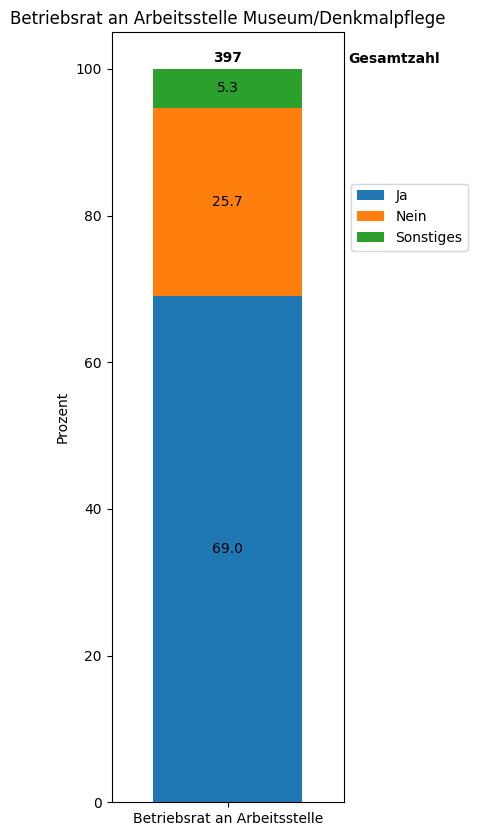

In [101]:
ax = works_council_M_df[works_council_M_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(3, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        #xlabel='Karrierepfad',
                        width=0.9,
                        title='Betriebsrat an Arbeitsstelle Museum/Denkmalpflege'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(['Betriebsrat an Arbeitsstelle'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=['Ja', 'Nein', 'Sonstiges'])

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(works_council_M_df['totals']):
    ax.text(works_council_M_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [102]:
fig = ax.get_figure()
fig.savefig('../reports/figures/M_05_Betriebsrat.png', bbox_inches='tight', dpi=300)

In [103]:
name = df_whole.columns.to_list()
# open file in write mode
with open(r'../data/interim/col_names_df_whole.txt', 'w') as fp:
    for item in name:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


## comparison stipend holders for dissertation and doctoral researchers at universities

Problem: There is no easy way to filter for doctoral researchers at universities. As an assumption I am defining those participants as doctoral researchers that have gotten their Bachelors, Masters, Diploma, Staatsexamen recently, are in a Qualifikationsphase and are working at a university.

In [104]:
UH_career = ls_cols_career[5]

In [108]:
DR_UH_df = df_whole[((df_whole['AP2[SQ002]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben?\xa0\xa0\xa0 [Master of Arts:]']==1) |
                     (df_whole['AP2[SQ003]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben?\xa0\xa0\xa0 [Magister Artium:]']) |
                     (df_whole['AP2[SQ004]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben?\xa0\xa0\xa0 [I. Staatsexamen:]']) |
                     (df_whole['AP2[SQ005]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben?\xa0\xa0\xa0 [II. Staatsexamen:]']) |
                     (df_whole['AP2[SQ006]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben?\xa0\xa0\xa0 [Diplom:]']) | 
                     (df_whole['AP2[SQ001]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben?\xa0\xa0\xa0 [Bachelor of Arts: ]'])) 
                    & 
                    (df_whole['AP3. Befinden Sie sich derzeit in einer Qualifikationsphase?']==1) & 
                    (df_whole['AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.\xa0  Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen:\xa0_Universität, Hochschule oder außeruniversitäre Forschungseinrichtung']==True)]

In [109]:
DR_UH_df.shape

(122, 836)

In [110]:
ls_col_position_UH = [col for col in df_whole.columns if col.startswith('UH1.')]

In [112]:
temp_df, temp_perc = cross_analysis_one_hot([UH_career], ls_col_position_UH, df=DR_UH_df)

In [113]:
temp_df

,UH1. Wie lautet die Bezeichnung für Ihre Position?_Akademische:r Oberrat bzw. -rätin,UH1. Wie lautet die Bezeichnung für Ihre Position?_Akademische:r Rat bzw. Rätin,UH1. Wie lautet die Bezeichnung für Ihre Position?_Assistent:in,UH1. Wie lautet die Bezeichnung für Ihre Position?_Außerplanmäßige oder -ordentliche Professor:in,UH1. Wie lautet die Bezeichnung für Ihre Position?_Juniorprofessor:in,UH1. Wie lautet die Bezeichnung für Ihre Position?_Kurator:in bzw. Kustod:in,UH1. Wie lautet die Bezeichnung für Ihre Position?_Lehrkraft für besondere Aufgaben,UH1. Wie lautet die Bezeichnung für Ihre Position?_Privatdozent:in,UH1. Wie lautet die Bezeichnung für Ihre Position?_Professor:in auf Zeit- oder Tenure-Track-Basis,UH1. Wie lautet die Bezeichnung für Ihre Position?_Sonstiges,...,UH1. Wie lautet die Bezeichnung für Ihre Position?_Kurator:in bzw. Kustod:inPercentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_Lehrkraft für besondere AufgabenPercentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_Privatdozent:inPercentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_Professor:in auf Zeit- oder Tenure-Track-BasisPercentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_SonstigesPercentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_Volontär:inPercentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche Hilfskraft (mit MA)Percentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche:r Mitarbeiter:inPercentage,"UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche:r Mitarbeiter:in in einem Graduiertenkolleg, SFB oder DrittmittelprojektPercentage",UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche:r Mitarbeiter:in mit KoordinationsaufgabenPercentage
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",0,1,5,0,1,0,1,0,1,13,...,0.0,0.819672,0.0,0.819672,10.655738,0.0,7.377049,44.262295,23.770492,6.557377


In [114]:
# remove those columns that have have only zeroes
temp_df = temp_df.loc[:, (temp_df != 0).any(axis=0)]
temp_df

,UH1. Wie lautet die Bezeichnung für Ihre Position?_Akademische:r Rat bzw. Rätin,UH1. Wie lautet die Bezeichnung für Ihre Position?_Assistent:in,UH1. Wie lautet die Bezeichnung für Ihre Position?_Juniorprofessor:in,UH1. Wie lautet die Bezeichnung für Ihre Position?_Lehrkraft für besondere Aufgaben,UH1. Wie lautet die Bezeichnung für Ihre Position?_Professor:in auf Zeit- oder Tenure-Track-Basis,UH1. Wie lautet die Bezeichnung für Ihre Position?_Sonstiges,UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche Hilfskraft (mit MA),UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche:r Mitarbeiter:in,"UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche:r Mitarbeiter:in in einem Graduiertenkolleg, SFB oder Drittmittelprojekt",UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche:r Mitarbeiter:in mit Koordinationsaufgaben,...,UH1. Wie lautet die Bezeichnung für Ihre Position?_Akademische:r Rat bzw. RätinPercentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_Assistent:inPercentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_Juniorprofessor:inPercentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_Lehrkraft für besondere AufgabenPercentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_Professor:in auf Zeit- oder Tenure-Track-BasisPercentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_SonstigesPercentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche Hilfskraft (mit MA)Percentage,UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche:r Mitarbeiter:inPercentage,"UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche:r Mitarbeiter:in in einem Graduiertenkolleg, SFB oder DrittmittelprojektPercentage",UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche:r Mitarbeiter:in mit KoordinationsaufgabenPercentage
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",1,5,1,1,1,13,9,54,29,8,...,0.819672,4.098361,0.819672,0.819672,0.819672,10.655738,7.377049,44.262295,23.770492,6.557377


In [115]:
temp_perc = [item for item in temp_df.columns.tolist() if item.endswith('Percentage')]
temp_perc

['UH1. Wie lautet die Bezeichnung für Ihre Position?_Akademische:r Rat bzw. RätinPercentage',
 'UH1. Wie lautet die Bezeichnung für Ihre Position?_Assistent:inPercentage',
 'UH1. Wie lautet die Bezeichnung für Ihre Position?_Juniorprofessor:inPercentage',
 'UH1. Wie lautet die Bezeichnung für Ihre Position?_Lehrkraft für besondere AufgabenPercentage',
 'UH1. Wie lautet die Bezeichnung für Ihre Position?_Professor:in auf Zeit- oder Tenure-Track-BasisPercentage',
 'UH1. Wie lautet die Bezeichnung für Ihre Position?_SonstigesPercentage',
 'UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche Hilfskraft (mit MA)Percentage',
 'UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche:r Mitarbeiter:inPercentage',
 'UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche:r Mitarbeiter:in in einem Graduiertenkolleg, SFB oder DrittmittelprojektPercentage',
 'UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche:r Mitarbeiter:in mit Koordina

In [116]:
ls_exclude = [col for col in temp_df if (col.endswith('Percentage')) | (col == 'totals')]
# get a list of university positions by first filtering out the unwanted column names and use only the string after _
ls_position_levels_DR_UH = [item.split(sep='_')[-1] for item in temp_df.columns.to_list() if item not in ls_exclude]

Text(1.02, 0.975, 'Gesamtzahl')

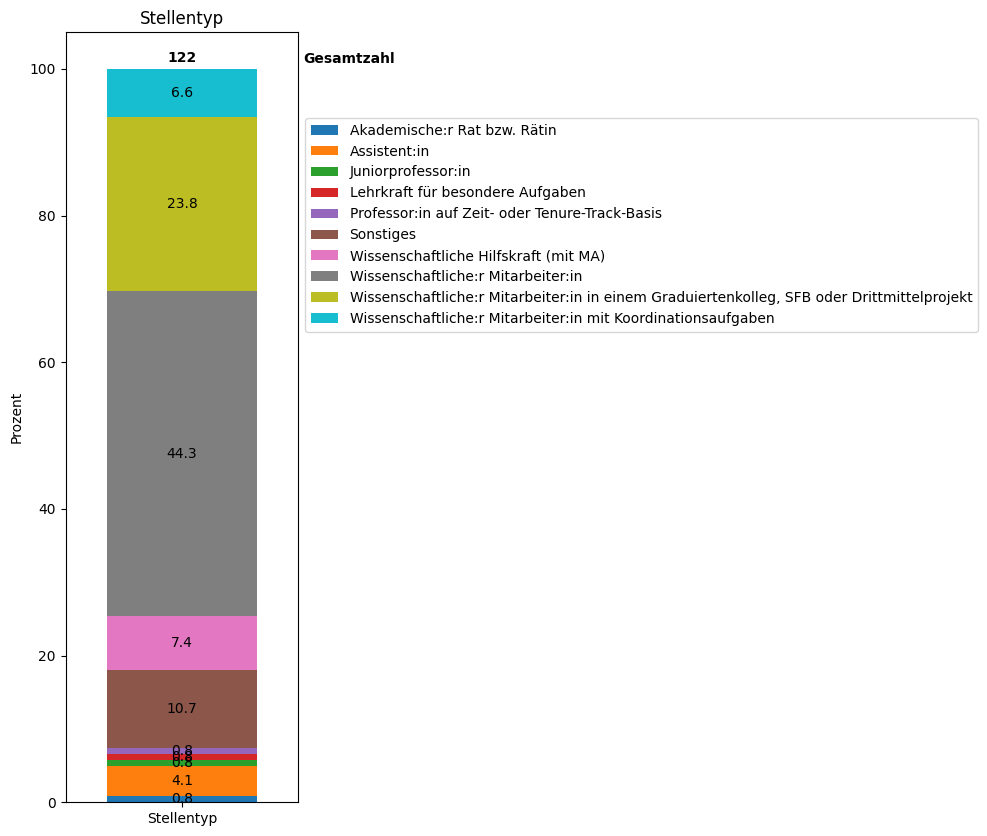

In [117]:
ax = temp_df[temp_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(3, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        #xlabel='Karrierepfad',
                        width=0.9,
                        title='Stellentyp'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(['Stellentyp'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.75), labels=ls_position_levels_DR_UH)

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(temp_df['totals']):
    ax.text(temp_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [118]:
fig = ax.get_figure()
fig.savefig('../reports/figures/UH_00_Stellentyp_Master_auf_Qualifikationsstelle.png', bbox_inches='tight', dpi=300)

Decision has to be made on whether to exclude Assistent:innen, Wissenschaftliche Hilfskräfte and Sonstige to be sure to have a pure Doctoral Researcher population.

In [121]:
# remove all entries that describe their position as Sonstiges, except if their LimeSurvey ID is 1517, 5, 557. Those reported themselves as Doktorand
DR_UH_df = DR_UH_df[~((DR_UH_df['UH1. Wie lautet die Bezeichnung für Ihre Position?_Sonstiges']) & ~(DR_UH_df['id. Antwort ID'].isin([1517, 5, 557])))]

In [123]:
DR_UH_df[DR_UH_df['UH1. Wie lautet die Bezeichnung für Ihre Position?_Sonstiges']]

,AP1. Wie alt sind Sie?,AP1. Wie alt sind Sie?_0.0,AP1. Wie alt sind Sie?_1.0,AP1. Wie alt sind Sie?_10.0,AP1. Wie alt sind Sie?_2.0,AP1. Wie alt sind Sie?_3.0,AP1. Wie alt sind Sie?_4.0,AP1. Wie alt sind Sie?_5.0,AP1. Wie alt sind Sie?_6.0,AP1. Wie alt sind Sie?_7.0,...,W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],W9. Bekommen Sie Ihre Vergütung pünktlich zum vertraglich vereinbarten Zeitpunkt?_1,W9. Bekommen Sie Ihre Vergütung pünktlich zum vertraglich vereinbarten Zeitpunkt?_Teils,id. Antwort ID
132,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,5
519,3.0,False,False,False,False,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,1517
568,3.0,False,False,False,False,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,557


In [132]:
# Remove those entries, that do not fit Doctoral Researcher positions
columns_to_check = ['UH1. Wie lautet die Bezeichnung für Ihre Position?_Akademische:r Rat bzw. Rätin',
                    'UH1. Wie lautet die Bezeichnung für Ihre Position?_Assistent:in',
                    'UH1. Wie lautet die Bezeichnung für Ihre Position?_Juniorprofessor:in',
                    'UH1. Wie lautet die Bezeichnung für Ihre Position?_Lehrkraft für besondere Aufgaben',
                    'UH1. Wie lautet die Bezeichnung für Ihre Position?_Professor:in auf Zeit- oder Tenure-Track-Basis',
                    'UH1. Wie lautet die Bezeichnung für Ihre Position?_Wissenschaftliche Hilfskraft (mit MA)']
DR_UH_df = DR_UH_df[~DR_UH_df[columns_to_check].any(axis=1)]

check if filtering worked.

Text(1.02, 0.975, 'Gesamtzahl')

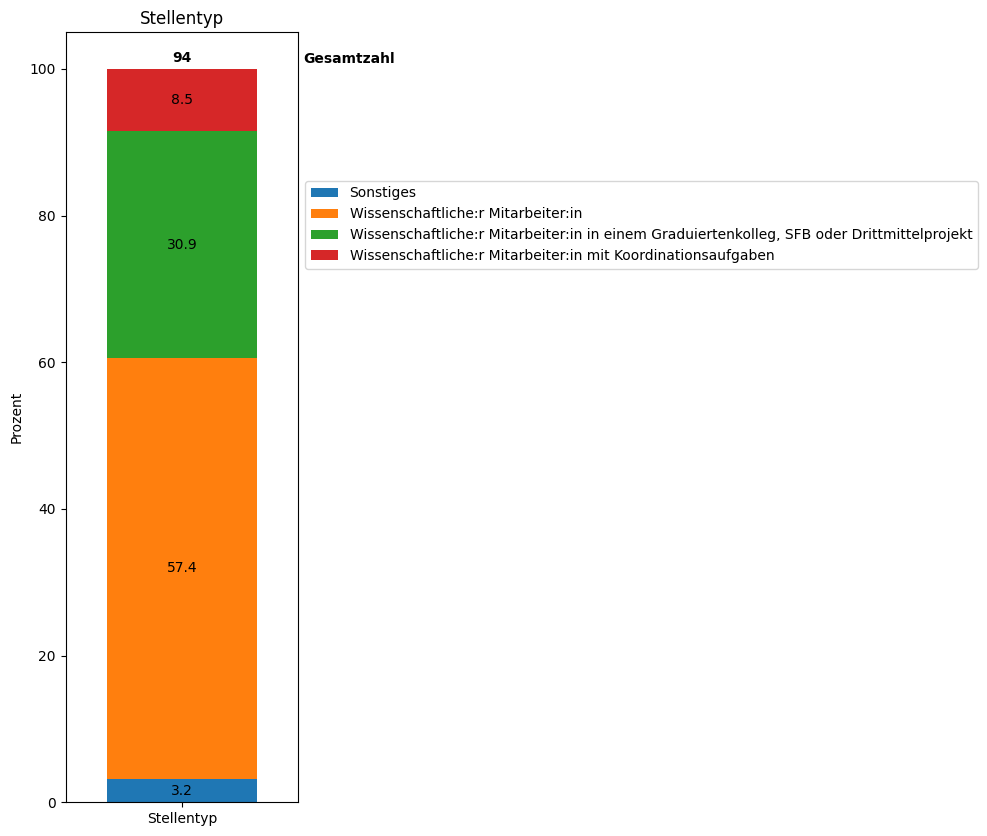

In [133]:
temp_df, temp_perc = cross_analysis_one_hot([UH_career], ls_col_position_UH, df=DR_UH_df)
# remove those columns that have have only zeroes
temp_df = temp_df.loc[:, (temp_df != 0).any(axis=0)]
temp_perc = [item for item in temp_df.columns.tolist() if item.endswith('Percentage')]
ls_exclude = [col for col in temp_df if (col.endswith('Percentage')) | (col == 'totals')]
# get a list of university positions by first filtering out the unwanted column names and use only the string after _
ls_position_levels_DR_UH = [item.split(sep='_')[-1] for item in temp_df.columns.to_list() if item not in ls_exclude]

ax = temp_df[temp_perc].plot(kind='bar', 
                        stacked=True, 
                        figsize=(3, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        #xlabel='Karrierepfad',
                        width=0.9,
                        title='Stellentyp'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(['Stellentyp'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.75), labels=ls_position_levels_DR_UH)

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(temp_df['totals']):
    ax.text(temp_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [143]:
# Create DataFrame with stipendholders that are doing a PhD
DR_stipend_df = df_whole[df_whole['S1[SQ004]. Zu welchem Zweck beziehen Sie ein Stipendium? [Promotions-Projekt]']==True]
print(DR_stipend_df.shape)
print(DR_UH_df.shape)

(38, 836)
(94, 836)


In [141]:
DR_df = pd.concat([DR_UH_df, DR_stipend_df])
DR_df

,AP1. Wie alt sind Sie?,AP1. Wie alt sind Sie?_0.0,AP1. Wie alt sind Sie?_1.0,AP1. Wie alt sind Sie?_10.0,AP1. Wie alt sind Sie?_2.0,AP1. Wie alt sind Sie?_3.0,AP1. Wie alt sind Sie?_4.0,AP1. Wie alt sind Sie?_5.0,AP1. Wie alt sind Sie?_6.0,AP1. Wie alt sind Sie?_7.0,...,W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],W9. Bekommen Sie Ihre Vergütung pünktlich zum vertraglich vereinbarten Zeitpunkt?_1,W9. Bekommen Sie Ihre Vergütung pünktlich zum vertraglich vereinbarten Zeitpunkt?_Teils,id. Antwort ID
4,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,93
6,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,96
7,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,102
9,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,133
12,1.0,False,True,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,1507
905,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,662
935,1.0,False,True,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,1605
1001,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,1711


In [147]:
cols_to_keep = [col for col in DR_df.columns if col.startswith(('AP', 'CO', 'S', 'UH'))]
DR_df = DR_df[cols_to_keep]
DR_df

,AP1. Wie alt sind Sie?,AP1. Wie alt sind Sie?_0.0,AP1. Wie alt sind Sie?_1.0,AP1. Wie alt sind Sie?_10.0,AP1. Wie alt sind Sie?_2.0,AP1. Wie alt sind Sie?_3.0,AP1. Wie alt sind Sie?_4.0,AP1. Wie alt sind Sie?_5.0,AP1. Wie alt sind Sie?_6.0,AP1. Wie alt sind Sie?_7.0,...,UH8. In welchem Bundesland sind Sie tätig?_Nordrhein-Westfalen,UH8. In welchem Bundesland sind Sie tätig?_Rheinland-Pfalz,UH8. In welchem Bundesland sind Sie tätig?_Saarland,UH8. In welchem Bundesland sind Sie tätig?_Sachsen,UH8. In welchem Bundesland sind Sie tätig?_Sachsen-Anhalt,UH8. In welchem Bundesland sind Sie tätig?_Schleswig-Holstein,UH8. In welchem Bundesland sind Sie tätig?_Thüringen,"UH9. Sind Ihre Tätigkeiten dieselben, wie vertraglich vereinbart? _0","UH9. Sind Ihre Tätigkeiten dieselben, wie vertraglich vereinbart? _1","UH9. Sind Ihre Tätigkeiten dieselben, wie vertraglich vereinbart? _Teils"
4,2.0,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
6,2.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,2.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9,2.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
12,1.0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,2.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
905,2.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
935,1.0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1001,2.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [148]:
DR_df.to_csv('../data/processed/04_doctoral_researchers.csv')